In [1]:
from utils import *
import warnings
import pandas as pd
import os
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Patch
warnings.filterwarnings('ignore')

# 1.0 Setting global variable

In [ ]:
# Setting folder path
f_path = "/Users/your/own/result/folder/results/"
FOLDER_PATH = f_path + "base/"

# 1.1 Create DataFrame and save to .csv file. (Only once)
Dismiss comments if need to run this block

In [3]:
# # Create DataFrame for SAM Vitb model test results and save to .csv file.
# vitb_data = read_data(FOLDER_PATH + "sam_vit_b_01ec64")
# vitb_result = create_df_result_by_models([vitb_data],["SAM_vitb"])
# vitb_result_p = project_label(vitb_result)
# vitb_result_p.to_csv(FOLDER_PATH + "sam_vit_b_01ec64.csv")

# # Create DataFrame for SAM Vith model test results and save to .csv file.
# vith_data = read_data(FOLDER_PATH + "sam_vit_h_4b8939")
# vith_result = create_df_result_by_models([vith_data],["SAM_vith"])
# vith_result_p = project_label(vith_result)
# vith_result_p.to_csv(FOLDER_PATH + "sam_vit_h_4b8939.csv")

# # Create DataFrame for MedSAM model test results and save to .csv file.
# medsam_data = read_data(FOLDER_PATH + "med_sam_rep.pkl")
# medsam_result = create_df_result_by_models([medsam_data],["MedSAM"])
# medsam_result_p = project_label(medsam_result)
# medsam_result_p.to_csv(FOLDER_PATH + "med_sam.csv")

# # Create DataFrame for SAMRI_box model test results and save to .csv file.
# samri_box_data = read_data(FOLDER_PATH + "samri_vitb_box")
# samri_box_result = create_df_result_by_models([samri_box_data],["SAMRI_box"])
# samri_box_result_p = project_label(samri_box_result)
# samri_box_result_p.to_csv(FOLDER_PATH + "samri_vitb_box.csv")

# # Create DataFrame for SAMRI_bp model test results and save to .csv file.
# samri_bp_data = read_data(FOLDER_PATH + "samri_vitb_bp")
# samri_bp_result = create_df_result_by_models([samri_bp_data],["SAMRI_bp"])
# samri_result_bp_p = project_label(samri_bp_result)
# samri_result_bp_p.to_csv(FOLDER_PATH + "samri_vitb_bp.csv")

# # combine the results of vitb, medsam, samri_box
# target_results = pd.concat([vitb_result_p, medsam_result_p, samri_box_result_p], ignore_index=True, axis=0)

# # columns we want in the final dataframe (and their order)
# final_cols = [
#     "Model", "Dataset", "img_path", "mask_path", "labels",
#     "b_dice", "b_hd", "b_msd", "area_percentage"
# ]

# # pick/rename from df1
# df1_pick = target_results[
#     ["Model", "Dataset", "img_path", "mask_path", "labels",
#      "b_dice", "b_hd", "b_msd", "area_percentage"]
# ].copy()

# # pick/rename from df2 (bp_* -> b_*)
# df2_pick = (
#     samri_result_bp_p[
#         ["Model", "Dataset", "img_path", "mask_path", "labels",
#          "bp_dice", "bp_hd", "bp_msd", "area_percentage"]
#     ]
#     .rename(columns={"bp_dice": "b_dice", "bp_hd": "b_hd", "bp_msd": "b_msd"})
#     .copy()
# )

# # combine
# all_data_results = pd.concat([df1_pick, df2_pick], ignore_index=True)[final_cols]

# # Save the combined results to a CSV file
# all_data_results.to_csv(FOLDER_PATH + "all_results.csv", index=False)

# 1.2 Read .csv data directly to accelerate data loading speed.

In [4]:
all_result = pd.read_csv(FOLDER_PATH + "all_results.csv")
vitb_result = pd.read_csv(FOLDER_PATH + "sam_vit_b_01ec64.csv")
vith_result = pd.read_csv(FOLDER_PATH + "sam_vit_h_4b8939.csv")

# 2.0 Comparation of SAM-vitb and SAM-vith model

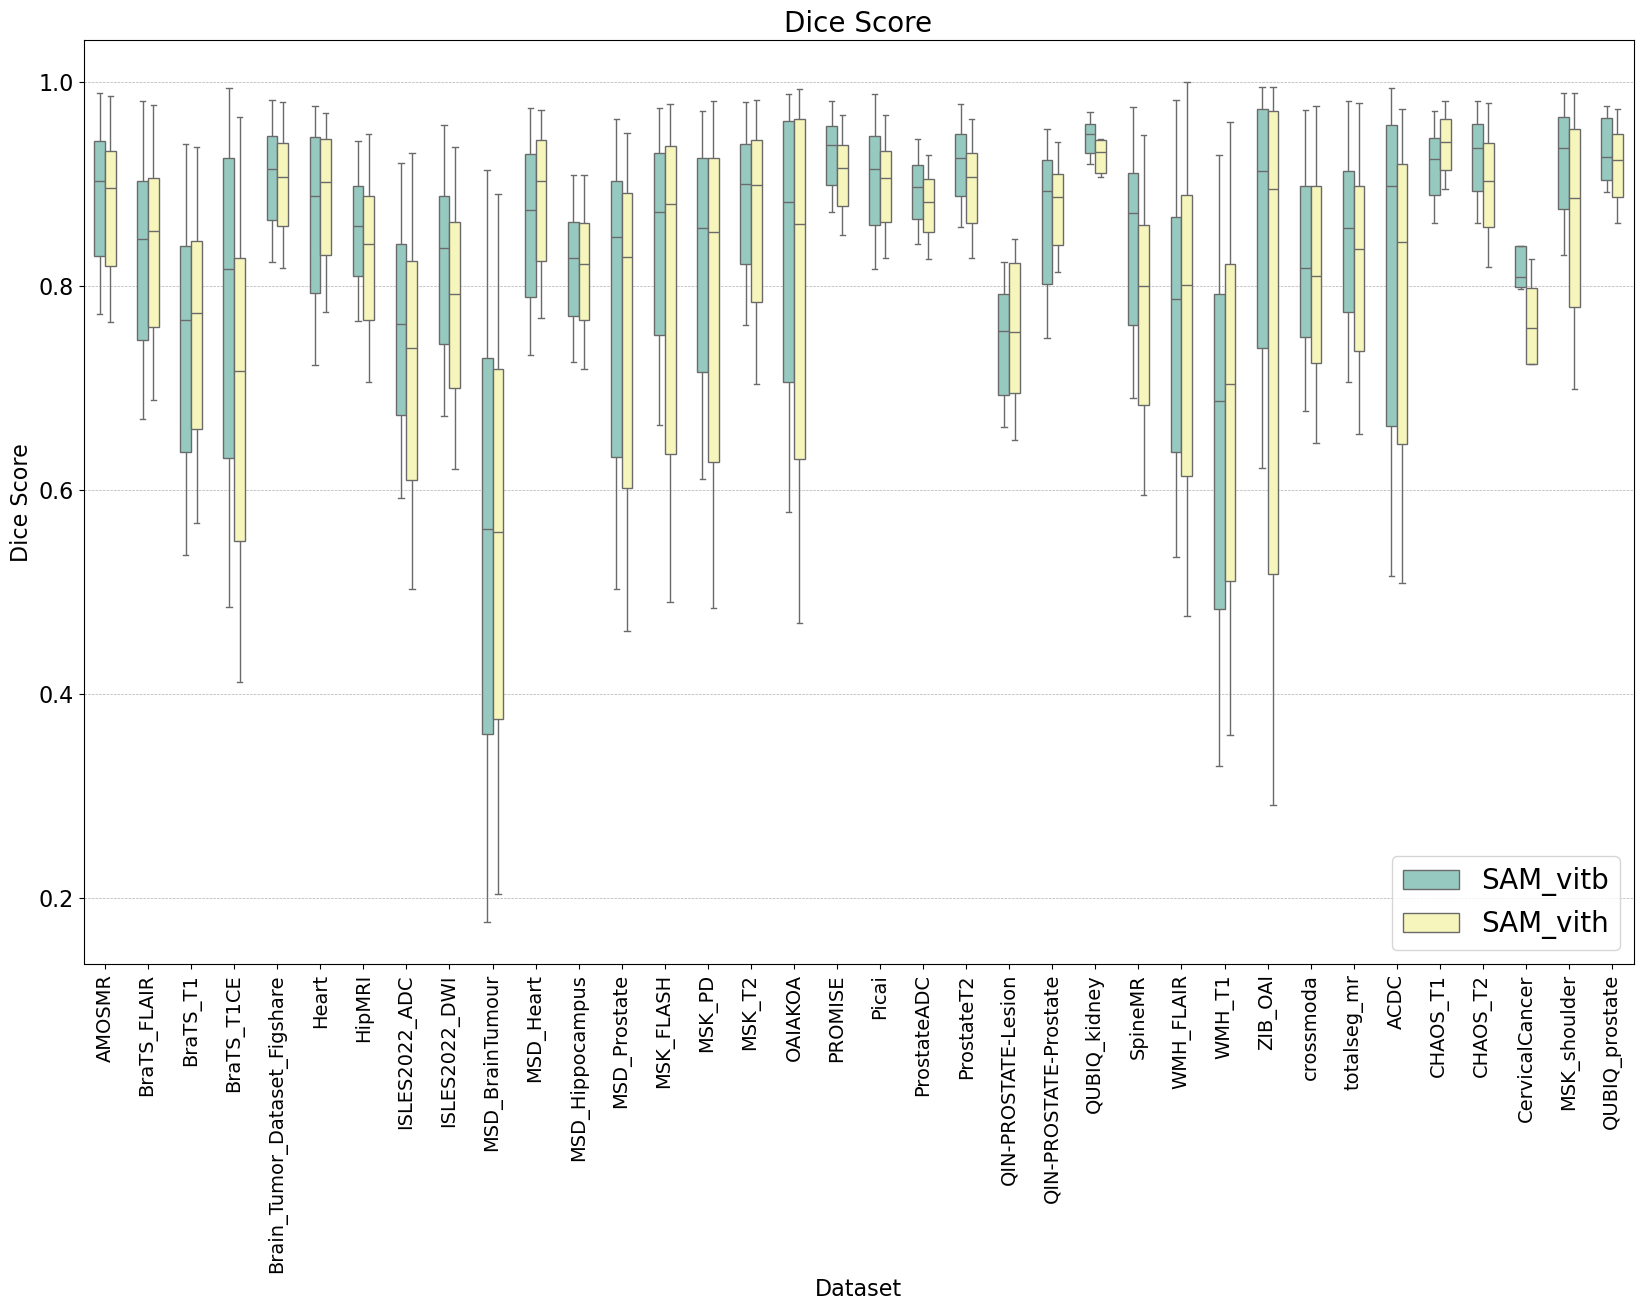

In [5]:
label_list = [vitb_result, vith_result]
show_results(result_list=label_list,  prompt="b",eval="dice", x="ds", plot_style="box")

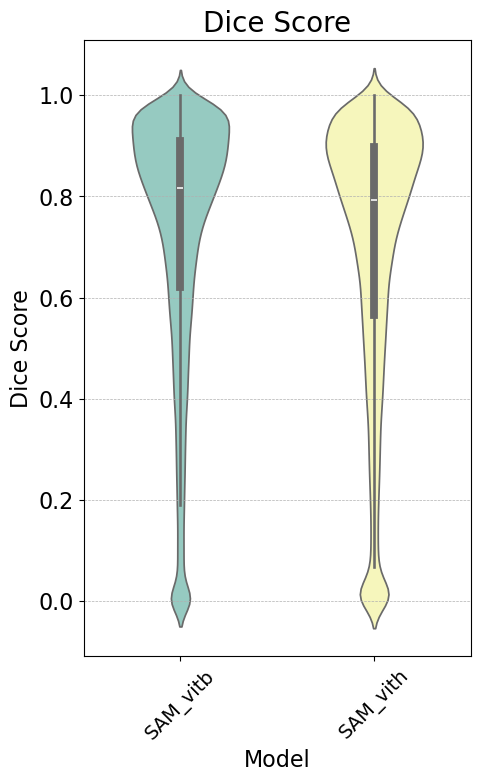

In [6]:
label_list = [vitb_result, vith_result]
show_results(result_list=label_list,  prompt="b",eval="dice", x="model", plot_style="violin")

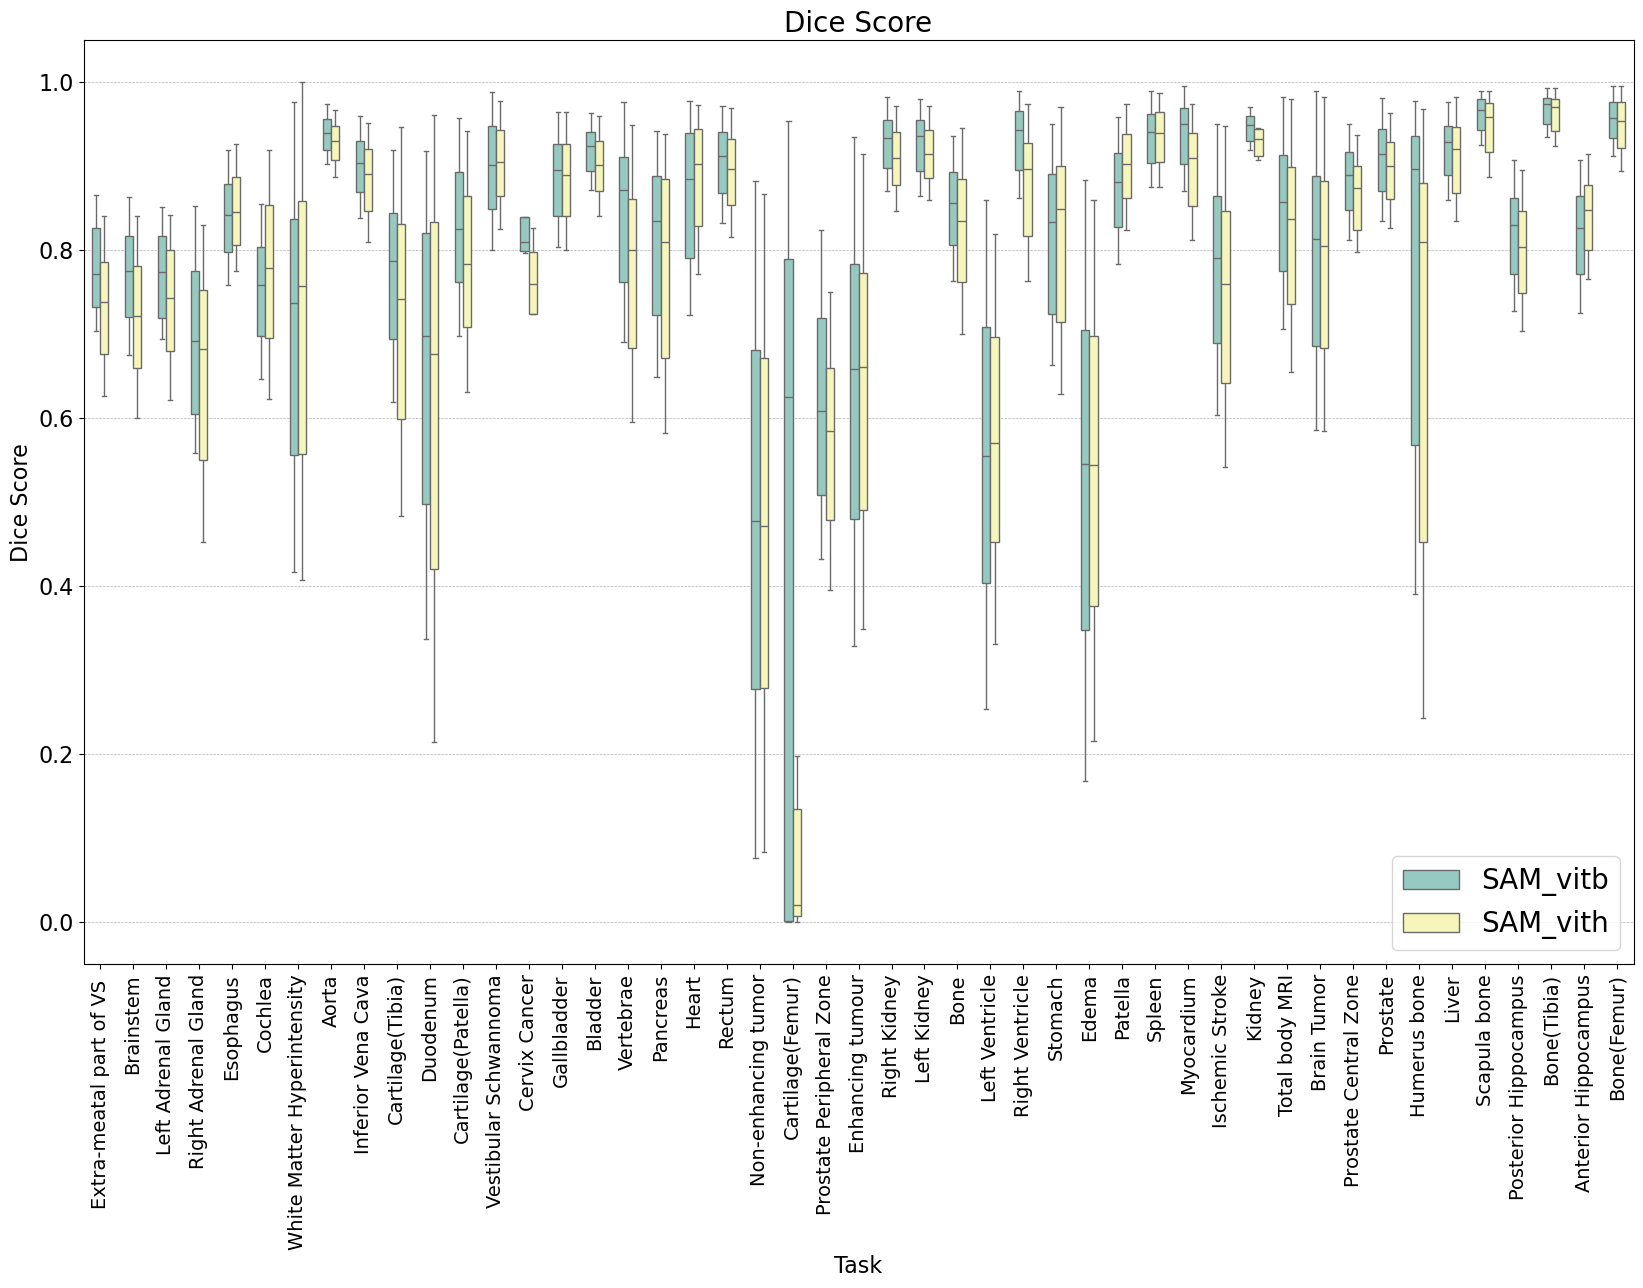

In [7]:
label_list = [vitb_result, vith_result]
show_results(result_list=label_list, prompt="b", eval="dice", x="tasks", plot_style="box")

# 3.0 Comparation of SAM-vitb, MedSAM, SAMRI(box), SAMRI(box+point) model.

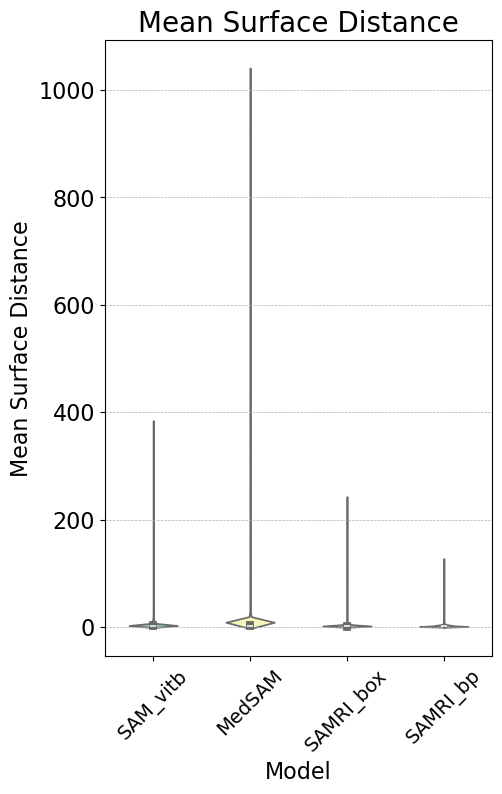

In [8]:
show_results(result_list=[all_result],  prompt="b",eval="msd", x="model", plot_style="violin")

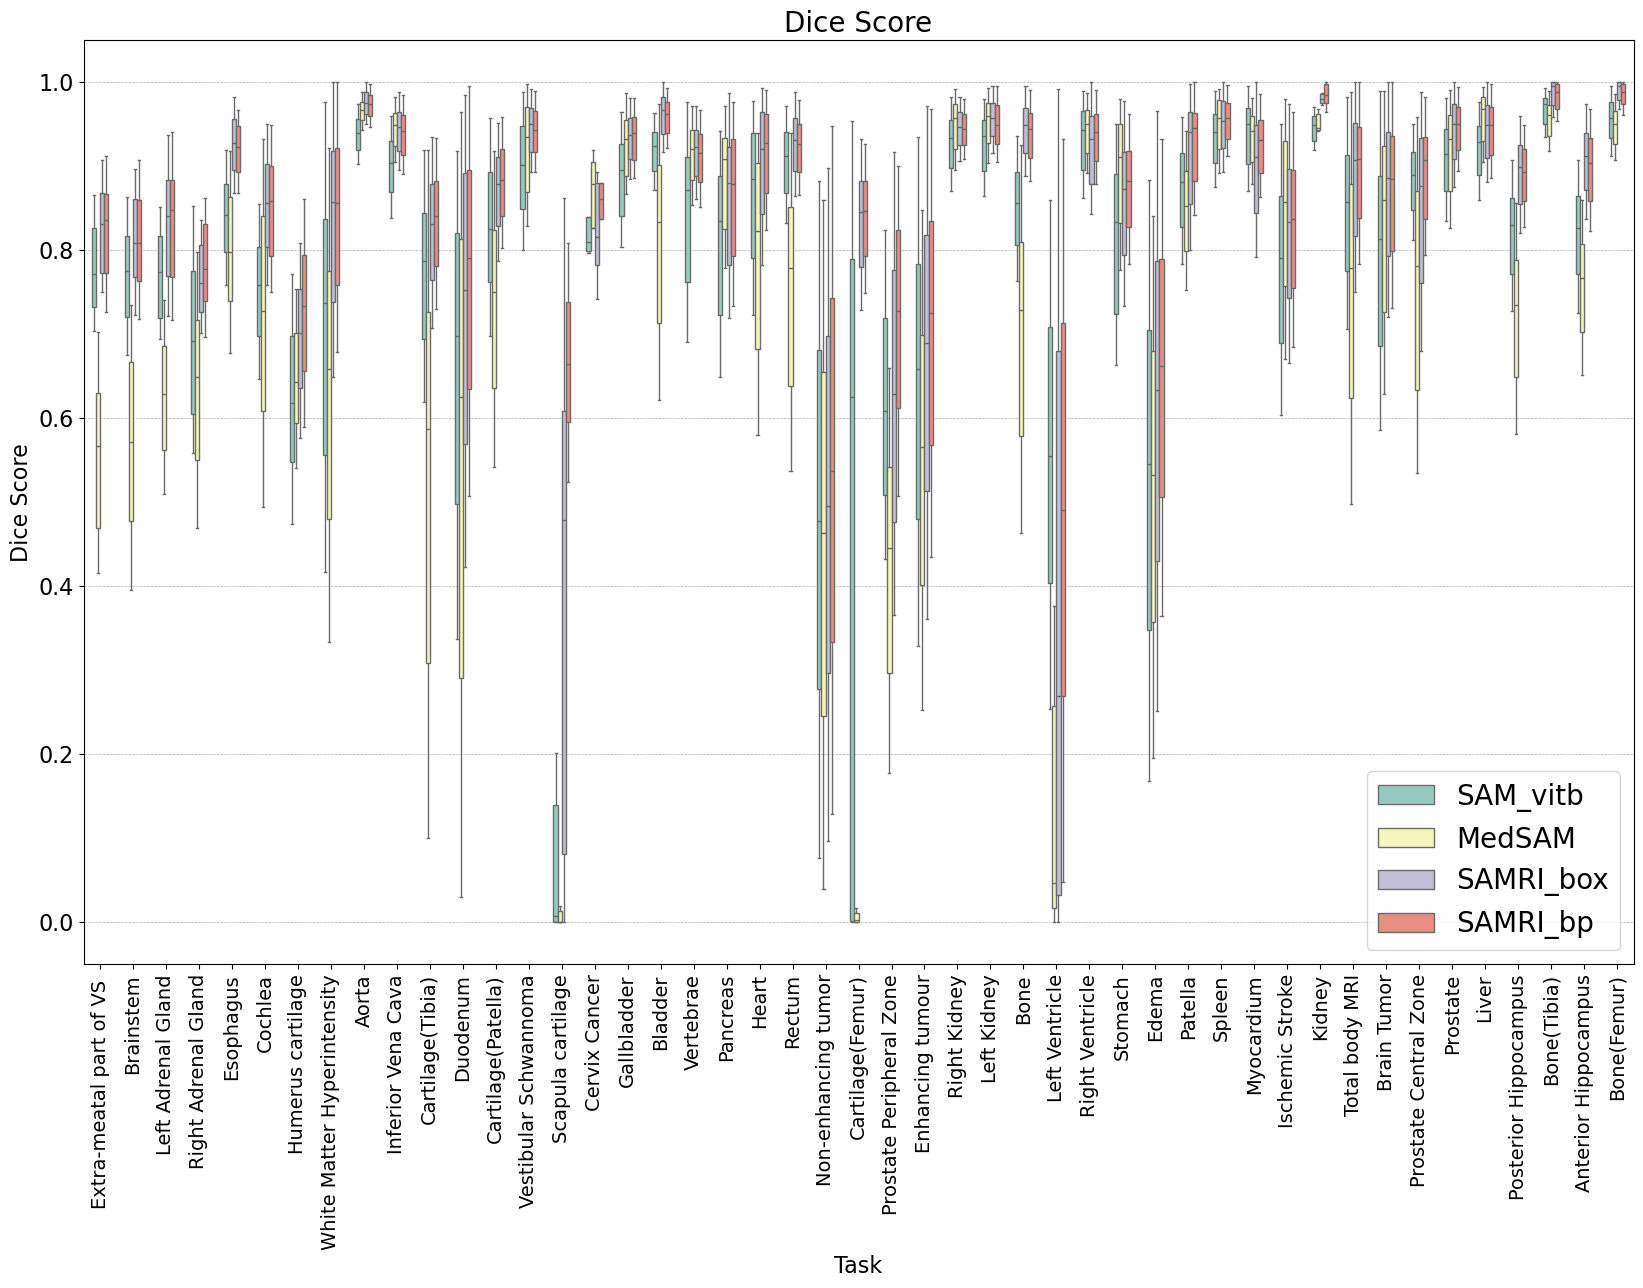

In [9]:
show_results(result_list=[all_result],  prompt="b",eval="dice", x="tasks", plot_style="box")

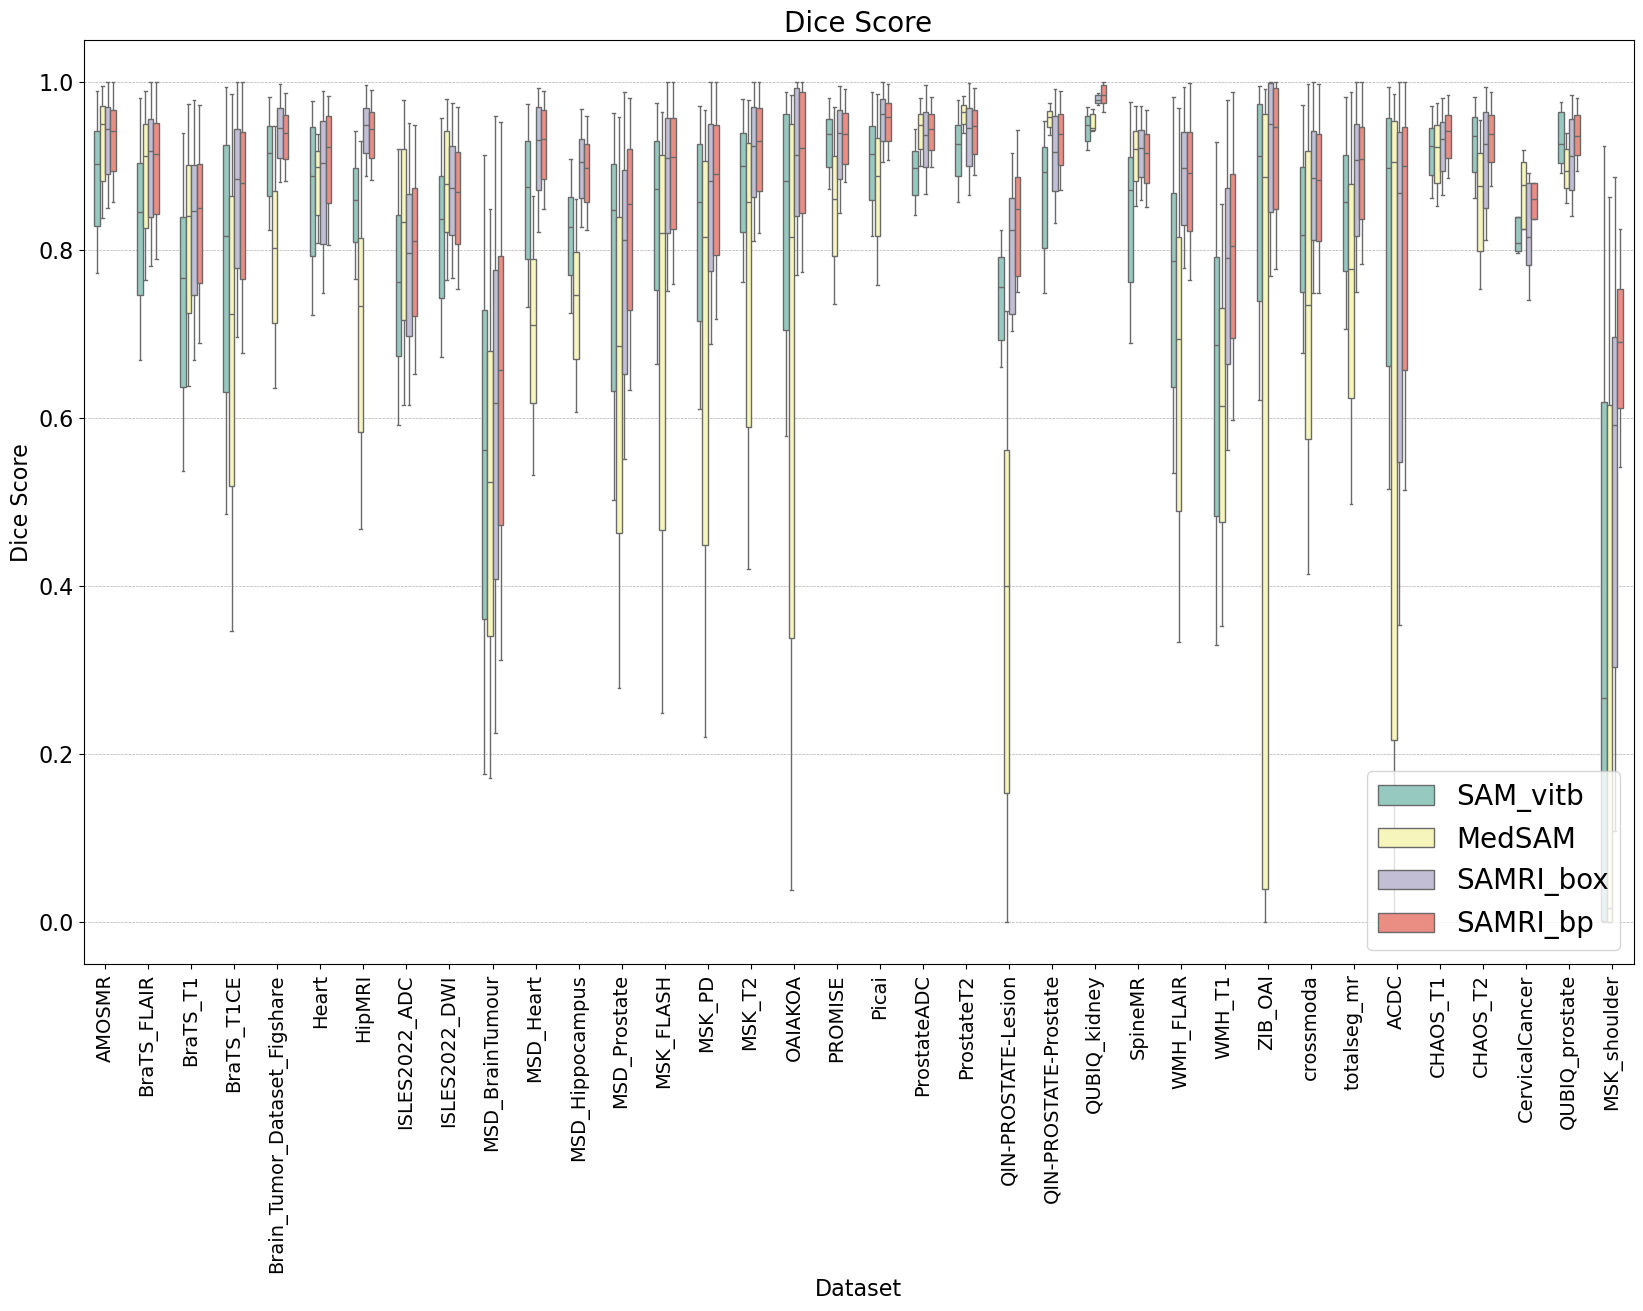

In [10]:
show_results(result_list=[all_result],  prompt="b",eval="dice", x="ds", plot_style="box")

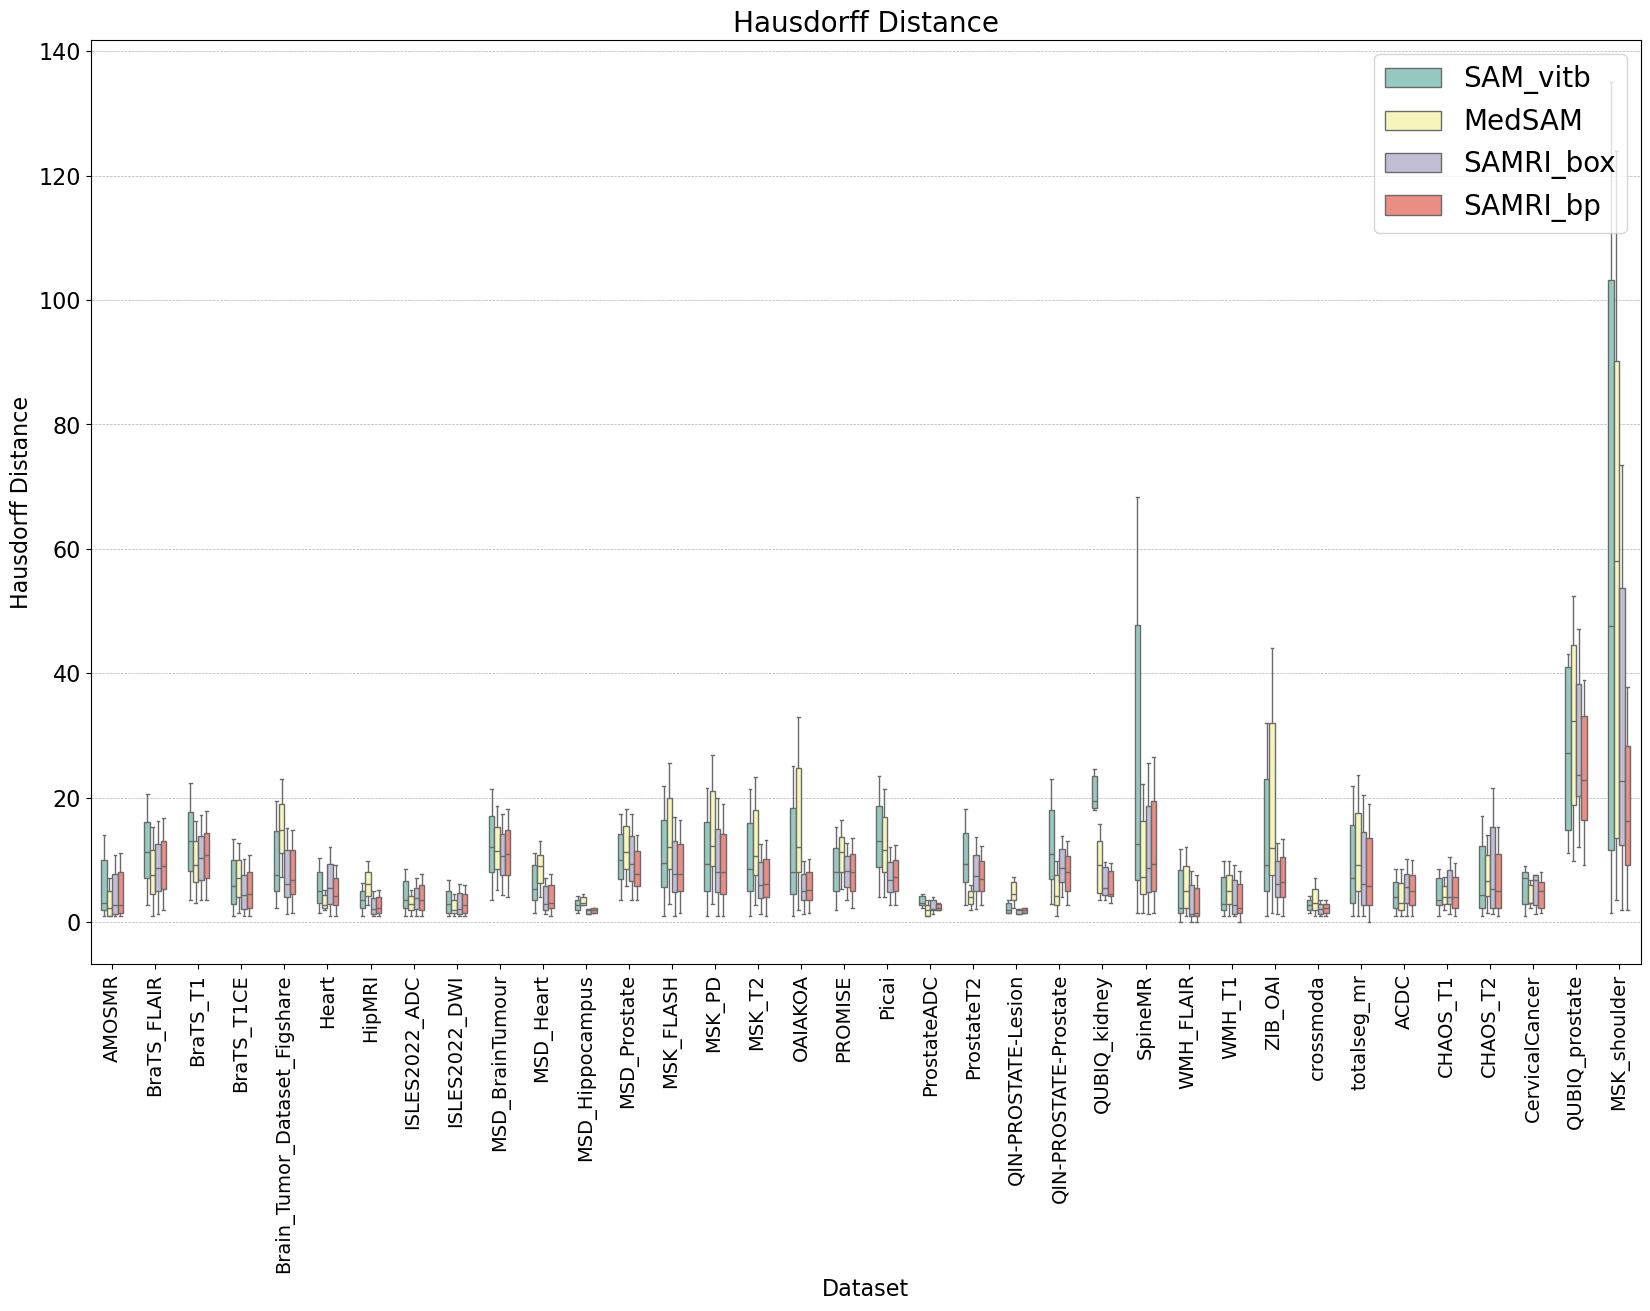

In [11]:
show_results(result_list=[all_result],  prompt="b",eval="hd", x="ds", plot_style="box")

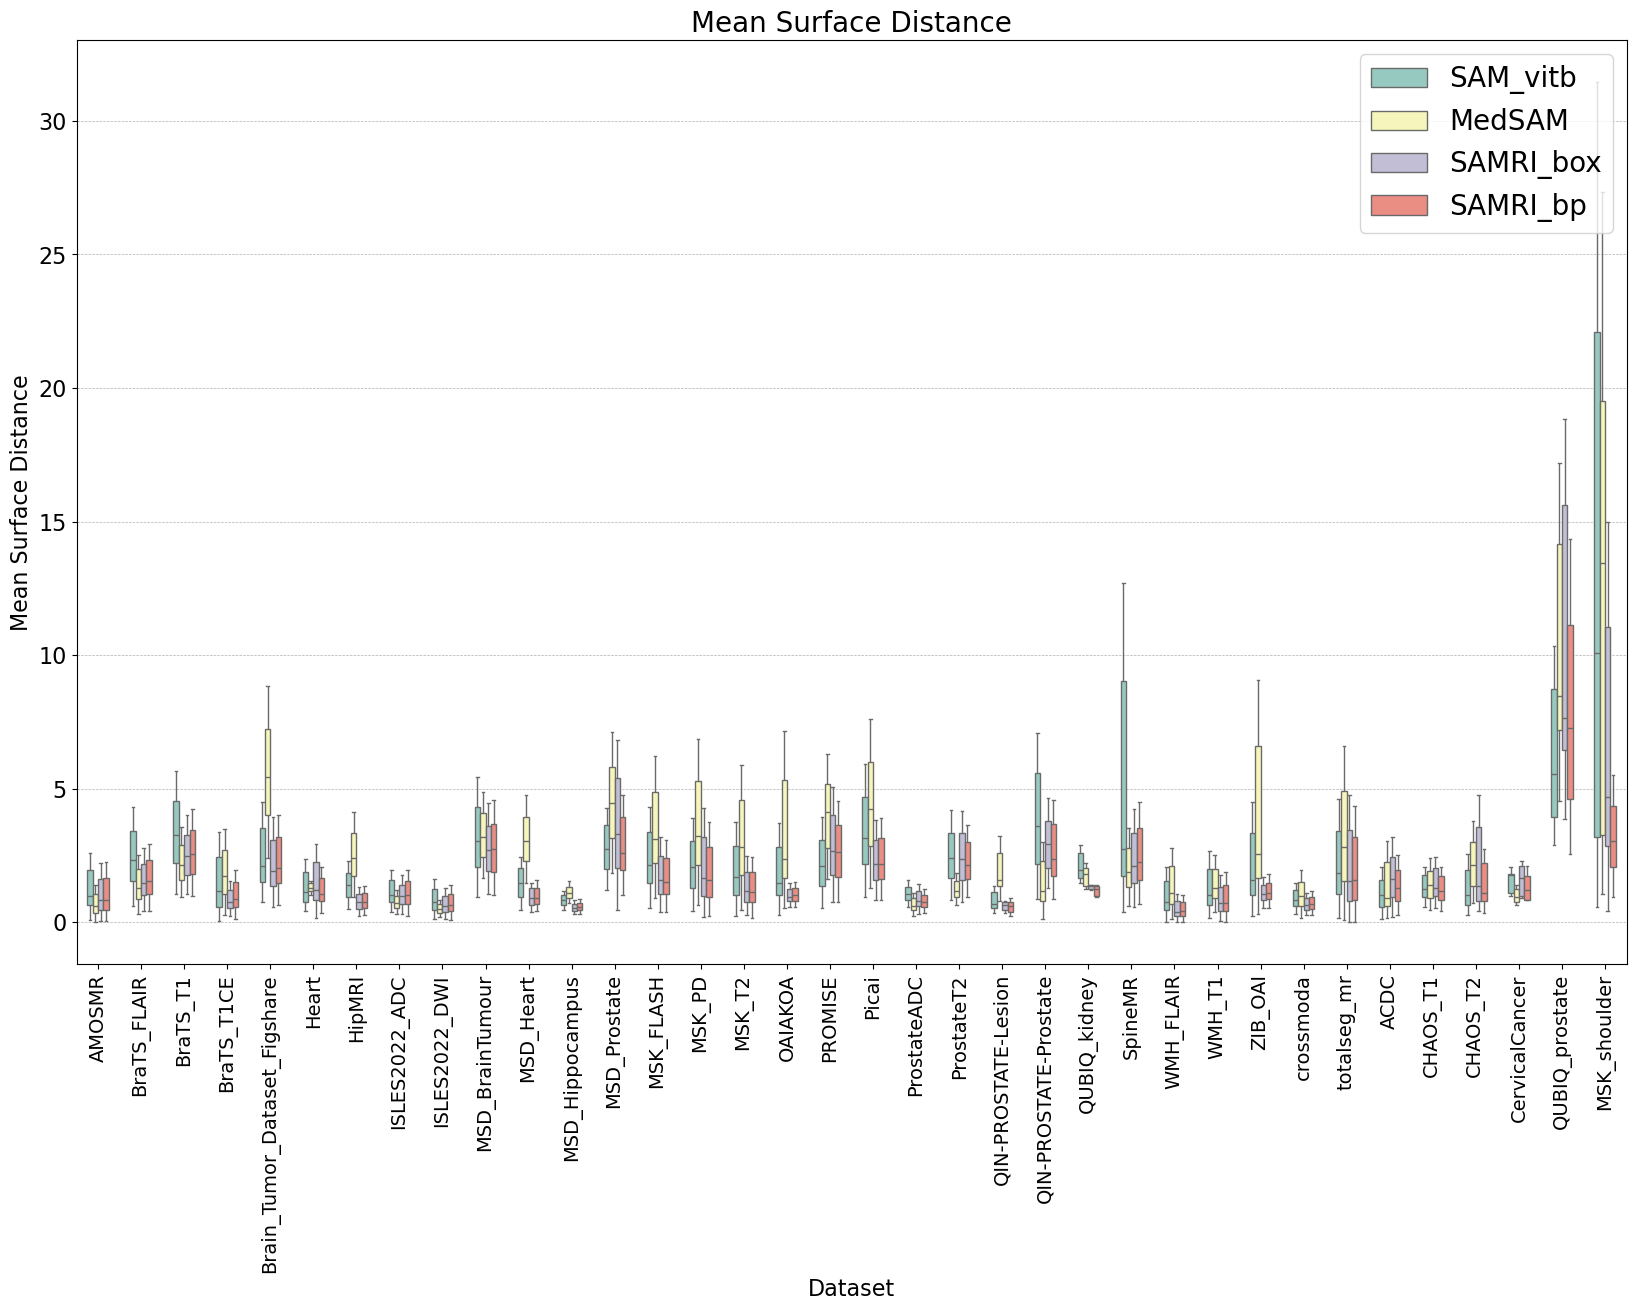

In [12]:
show_results(result_list=[all_result],  prompt="b",eval="msd", x="ds", plot_style="box")

# 3.1 Calculate the statistical results of SAM_vitb, MedSAM, SAMRI(box), SAMRI(box+point)

In [13]:
"""
# Group by = "Dataset" or "labels"
# eval_key = "dice" or "hd" or "msd"
# This cell is used to visualize the statistical results of different models on different datasets.
# Next cell will calculate all statistical results and save them to a .csv file.
"""
summarize_metric(all_result, group_by="Dataset", eval_key="msd", wilcoxon=True)

Model,SAM_vitb,MedSAM,SAMRI_box,SAMRI_bp
Dataset,,,,
ACDC,"1.01 (0.58, 1.58)*†","0.92 (0.62, 2.25)*","1.62 (0.93, 2.43)","1.29 (0.81, 1.95)"
AMOSMR,"0.99 (0.64, 1.95)*†","0.59 (0.36, 1.05)*†","0.81 (0.44, 1.63)","0.82 (0.46, 1.66)"
Brain_Tumor_Dataset_Figshare,"2.09 (1.51, 3.53)*†","5.44 (4.01, 7.25)*†","1.93 (1.36, 3.08)","2.03 (1.46, 3.19)"
BraTS_FLAIR,"2.34 (1.53, 3.40)*†","1.30 (0.86, 1.97)*†","1.47 (1.00, 2.20)","1.56 (1.05, 2.31)"
BraTS_T1,"3.27 (2.22, 4.52)*†","2.14 (1.58, 2.90)*†","2.47 (1.78, 3.26)","2.57 (1.80, 3.44)"
BraTS_T1CE,"1.18 (0.58, 2.45)*†","1.71 (1.05, 2.69)*†","0.77 (0.54, 1.20)","0.87 (0.57, 1.50)"
CervicalCancer,"1.76 (1.08, 1.81)","0.96 (0.76, 1.24)","1.66 (0.99, 2.11)","1.20 (0.84, 1.72)"
CHAOS_T1,"1.24 (0.93, 1.76)*","1.39 (0.89, 1.90)*","1.29 (0.97, 2.04)","1.18 (0.84, 1.73)"
CHAOS_T2,"1.01 (0.65, 1.95)*†","2.14 (1.36, 2.99)†","1.35 (0.79, 3.55)","1.09 (0.79, 2.22)"


In [14]:
## Group by = "Dataset" or "labels"
## eval_key = "dice" or "hd" or "msd"
## Calculate statistical results from all combinations and save them to a .csv file.
## This cell is only run once. Dismiss comments if need to run this block.

# for group_by in ("Dataset", "labels"):
#     for eval_key in ("dice", "hd", "msd"):
#         table = summarize_metric(all_result, group_by=group_by, eval_key=eval_key)
#         prefix = "ds" if group_by == "Dataset" else "target"
#         file_name = f"{prefix}_{eval_key}_quater.csv"
#         out_path = os.path.join(FOLDER_PATH, file_name)
#         table.to_csv(out_path)

In [15]:
# # Calculate Wilcoxon results and save to .csv file.
# # This cell is only run once. Dismiss comments if need to run this block.
# # The results are saved as "wilcoxon_results_ds.csv" and "wilcoxon_results_labels.csv" in the base folder.
# # The results are just saved for supplimentary materials. The summarize function already includes the significance marks. 
# results_df = calculate_wilcoxon(all_result, by="Dataset")
# results_df.to_csv(f_path + "base/" + "wilcoxon_results_ds.csv", index=False)
# results_df = calculate_wilcoxon(all_result, by="labels")
# results_df.to_csv(f_path + "base/" + "wilcoxon_results_labels.csv", index=False)

# 4.0 Small object performance

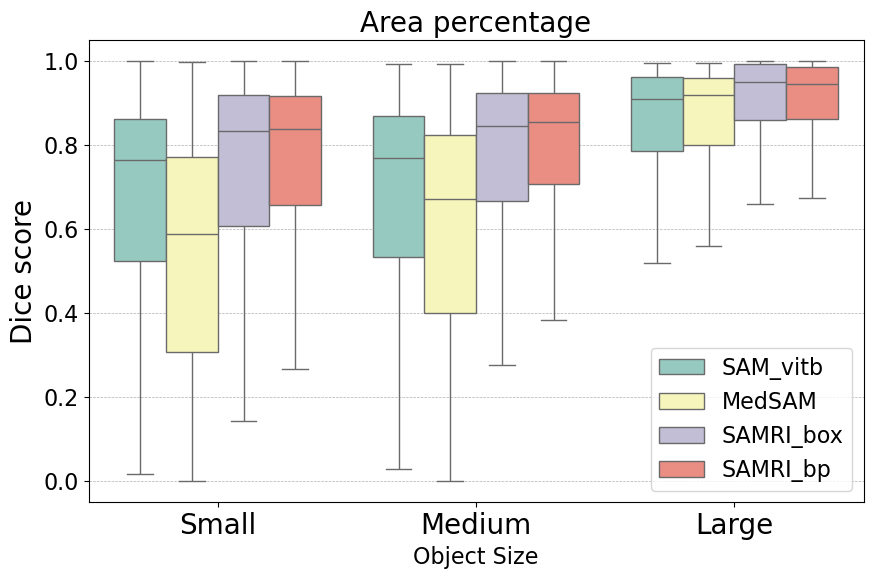

In [16]:
small_object_show(all_result, plot_style="box")

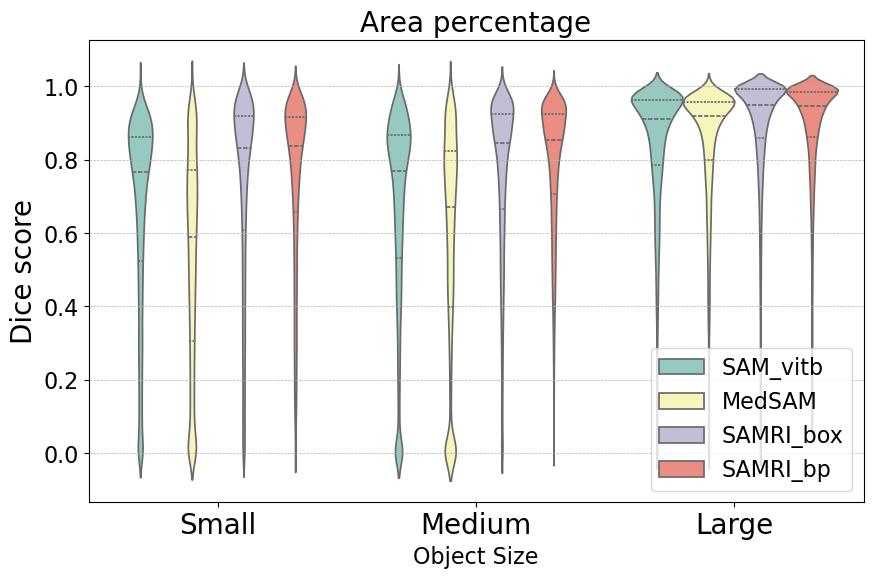

In [17]:
small_object_show(all_result, plot_style="violin")

# 4.1 Calculate the statistical results of small object intervals.

In [18]:
# mean ± std table (Script 1 equivalent)
tbl_mean = area_model_table(all_result, method="mean")
print(tbl_mean)
# median ± IQR table (Script 2 equivalent)
tbl_median = area_model_table(all_result, method="median")
print(tbl_median)


Model            MedSAM    SAMRI_box     SAMRI_bp     SAM_vitb
area_class                                                    
small       0.53 ± 0.29  0.72 ± 0.26  0.75 ± 0.23  0.66 ± 0.27
medium      0.58 ± 0.31  0.76 ± 0.22  0.79 ± 0.18  0.66 ± 0.27
large       0.85 ± 0.17  0.90 ± 0.14  0.90 ± 0.12  0.84 ± 0.17
Model            MedSAM    SAMRI_box     SAMRI_bp     SAM_vitb
area_class                                                    
small       0.59 ± 0.47  0.83 ± 0.31  0.84 ± 0.26  0.76 ± 0.34
medium      0.67 ± 0.42  0.85 ± 0.26  0.85 ± 0.22  0.77 ± 0.34
large       0.92 ± 0.16  0.95 ± 0.13  0.95 ± 0.12  0.91 ± 0.18


In [19]:
# # Save the result to a CSV file. Dismiss the comments if needed.
# tbl_mean.to_csv(FOLDER_PATH + "small_object_stat_mean.csv")
# tbl_median.to_csv(FOLDER_PATH + "small_object_stat_median.csv")

# 5.0 Comprehensive visualize the results

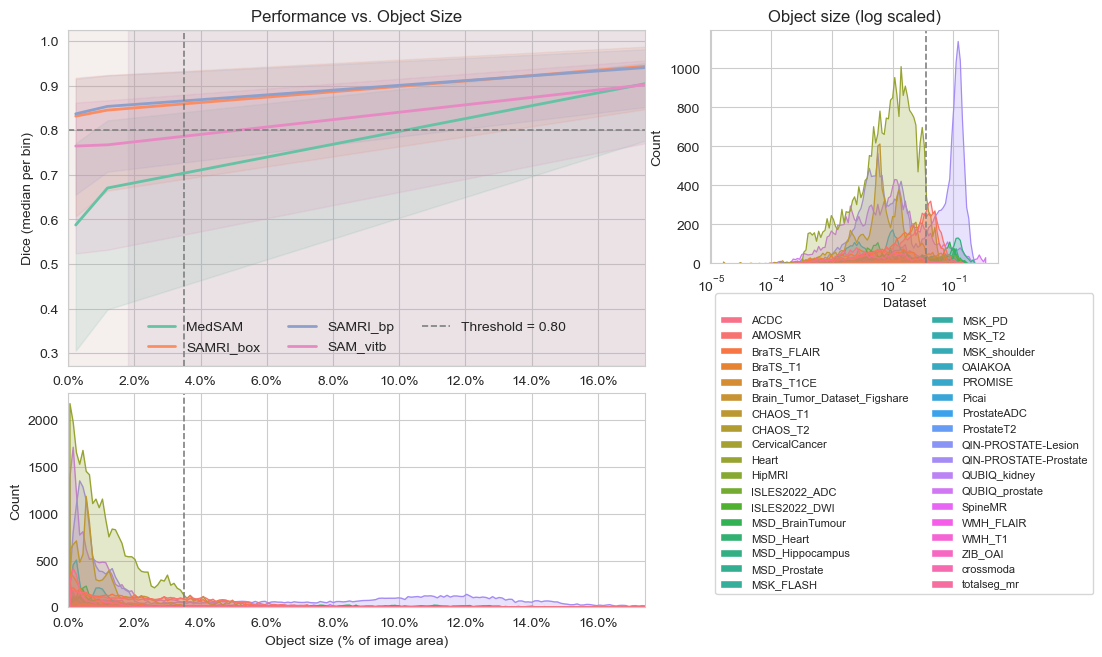

In [20]:

# --- 2×(2) figure with right column split into two rows (zoom + legend) ---
# --- Data ---
result = all_result
pixel_result = pd.read_csv(os.path.join(FOLDER_PATH, "sam_vit_b_01ec64.csv"))

# --- Build histogram edges from quantile bins robustly ---
def _get_hist_edges(df: pd.DataFrame) -> np.ndarray:
    if "area_class" in df.columns and pd.api.types.is_categorical_dtype(df["area_class"]) \
       and isinstance(df["area_class"].cat.categories, pd.IntervalIndex):
        cats = df["area_class"].cat.categories
        return np.r_[cats.left.values, cats.right.values[-1]]
    _, edges = pd.qcut(df["area_percentage"], q=3, retbins=True, duplicates="drop")
    return edges

hist_edges = _get_hist_edges(result)

# --- Hue order + palette for the histograms/legend ---
if "Dataset" not in pixel_result.columns:
    raise KeyError("`Dataset` column is missing in pixel_result CSV.")
hue_order = sorted(pixel_result["Dataset"].dropna().unique().tolist())
pal = sns.color_palette("husl", n_colors=len(hue_order))

# --- Figure: left column has two rows; right column is split into zoom(top-small) + legend(bottom) ---
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 7.5))
gs = GridSpec(
    nrows=2, ncols=2,
    width_ratios=[4.4, 2.2],
    height_ratios=[2.2, 1.4],
    wspace=0.15, hspace=0.10,
)

# Left column axes
ax_top = fig.add_subplot(gs[0, 0])
ax_bot = fig.add_subplot(gs[1, 0], sharex=ax_top)

# Right column is a sub-grid with two rows: [zoom (smaller), legend (larger)]
right_gs = gs[:, 1].subgridspec(2, 1, height_ratios=[0.5, 0.7], hspace=0.06)
ax_zoom = fig.add_subplot(right_gs[0, 0])
ax_leg  = fig.add_subplot(right_gs[1, 0])
ax_leg.axis("off")


# --- Panel A (top): lines + IQR ribbons ---
# Fallback: if `agg` is not provided, compute it from `result`.
if 'agg' not in globals():
    needed = {"Model", "area_percentage", "b_dice"}
    missing = needed.difference(result.columns)
    if missing:
        raise KeyError(f"Missing columns for building `agg`: {sorted(missing)}")
    tmp = result[["Model", "area_percentage", "b_dice"]].dropna()
    # Ensure we have Interval bins available
    if "area_class" in result.columns and pd.api.types.is_categorical_dtype(result["area_class"]) \
       and isinstance(result["area_class"].cat.categories, pd.IntervalIndex):
        tmp = tmp.join(result["area_class"])  # reuse existing bins
    else:
        tmp["area_class"] = pd.qcut(tmp["area_percentage"], q=3, duplicates="drop")
    # Summaries per (Model, bin)
    agg = (
        tmp.groupby(["Model", "area_class"])['b_dice']
        .agg(
            median_s='median',
            q25_s=lambda s: s.quantile(0.25),
            q75_s=lambda s: s.quantile(0.75),
        )
        .reset_index()
    )
    # Numeric bin center for plotting
    agg["bin_center"] = agg["area_class"].apply(lambda iv: (iv.left + iv.right) / 2)

palette = sns.color_palette("Set2", n_colors=int(agg["Model"].nunique()))
for (model, g), color in zip(agg.groupby("Model", sort=True), palette):
    g = g.sort_values("bin_center")
    ax_top.fill_between(g["bin_center"], g["q25_s"], g["q75_s"], alpha=0.15, color=color)
    ax_top.plot(g["bin_center"], g["median_s"], label=model, color=color, linewidth=2)

thr = 0.80
ax_top.axhline(thr, ls="--", lw=1.2, color="gray", label=f"Threshold = {thr:.2f}")

# Shade regions where median_s >= thr by bin spans derived from `hist_edges`
def shade_working(ax, g, color):
    g = g.sort_values("bin_center").reset_index(drop=True)
    above = g["median_s"] >= thr
    # Map each bin_center to its histogram bin index
    idx = np.searchsorted(hist_edges, g["bin_center"].to_numpy(), side="right") - 1
    idx = np.clip(idx, 0, len(hist_edges) - 2)
    starts = np.where(above & ~above.shift(fill_value=False))[0]
    ends = np.where(~above & above.shift(fill_value=False))[0] - 1
    if len(above) and bool(above.iloc[-1]):
        ends = np.append(ends, len(g) - 1)
    for s, e in zip(starts, ends):
        left = hist_edges[idx[s]]
        right = hist_edges[idx[e] + 1]
        ax.axvspan(left, right, color=color, alpha=0.08)

for (model, g), color in zip(agg.groupby("Model", sort=True), palette):
    shade_working(ax_top, g, color)

ax_top.set_ylabel("Dice (median per bin)")
ax_top.set_title("Performance vs. Object Size")

# --- Panel B (bottom-left): full-range histogram (aligned bins) ---
sns.histplot(
    data=pixel_result,
    x="area_percentage",
    hue="Dataset",
    element="poly",
    stat="count",          # change to 'density' for normalized distributions
    common_norm=False,
    ax=ax_bot,
    legend=False,           # we'll draw a clean legend on the right panel
)

# --- Panel C (top-right): zoomed histogram (0–4%) ---

sns.histplot(
    data=pixel_result,
    x="area_percentage",
    hue="Dataset",
    element="poly",
    linewidth=0.9,
    stat="count",
    common_norm=False,
    legend=False,
    ax=ax_zoom,
    log_scale=True
)
ax_zoom.set_title("Object size (log scaled)")
ax_zoom.set_ylabel("Count")
ax_zoom.set_xlabel("")  # keep compact

# --- Reference line at 3.5% on all x-panels ---
for ax in (ax_top, ax_bot, ax_zoom):
    ax.axvline(x=0.035, color="gray", linestyle="--", linewidth=1.2)

# --- X-axis formatting (keeps ORIGINAL units) ---
if max(result["area_percentage"].max(), pixel_result["area_percentage"].max()) <= 1.0 + 1e-9:
    ax_bot.xaxis.set_major_formatter(PercentFormatter(xmax=1.0))
    ax_top.set_xlabel("Object size (% of image area)")
else:
    ax_top.set_xlabel("Object size (% of image area)")

ax_bot.set_ylabel("Count")
ax_bot.set_xlabel("Object size (% of image area)")

# ---- x-limits for shared left column (start at 0; clamp to near-max range) ---
xmin = 0.0
xmax = np.nanmax([
    result["area_percentage"].quantile(0.995),
    pixel_result["area_percentage"].quantile(0.995),
])
ax_top.set_xlim(left=xmin, right=xmax)

# --- Left-panel legend (models) ---
ax_top.legend(loc="lower center", ncol=min(3, int(agg["Model"].nunique()) + 1), frameon=False)

# --- Panel D (bottom-right): datasets legend ---
handles = [Patch(facecolor=pal[i], label=label) for i, label in enumerate(hue_order)]
ax_leg.legend(
    handles, [h.get_label() for h in handles],
    title="Dataset",
    loc="center left",
    frameon=True,
    fontsize=8,
    title_fontsize=9,
    ncol=2
)
ax_leg.set_title("")

plt.show()


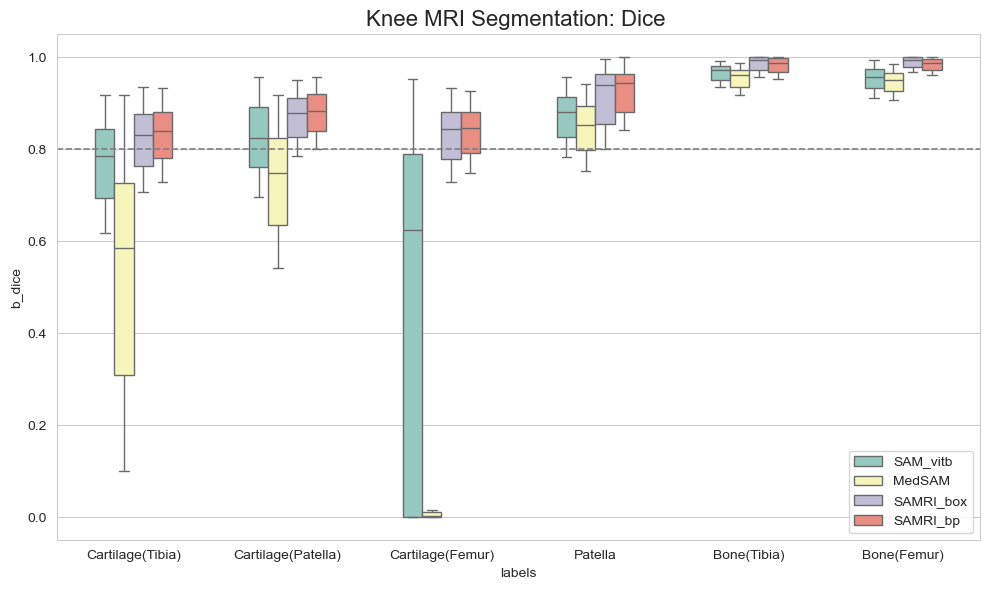

In [21]:
# Filtered label list
selected_labels = [
    "Bone(Femur)", "Cartilage(Femur)", "Bone(Tibia)",
    "Cartilage(Tibia)", "Patella", "Cartilage(Patella)"
]

# Filtered data and sorted label order
filtered_data = all_result[all_result["labels"].isin(selected_labels)]
label_order = (
    filtered_data.groupby("labels")["area_percentage"]
    .mean()
    .sort_values()
    .index
)

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    x="labels", y="b_dice", data=filtered_data,
    hue="Model", palette="Set3", showfliers=False, width=0.5, whis=0.5,
    order=label_order, ax=ax
)
ax.axhline(y=0.8, color='gray', linestyle='--', linewidth=1.2)
ax.legend(loc="lower right")
ax.set_title("Knee MRI Segmentation: Dice ", fontsize=16)
# plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

# 6.0 Zero shot capability

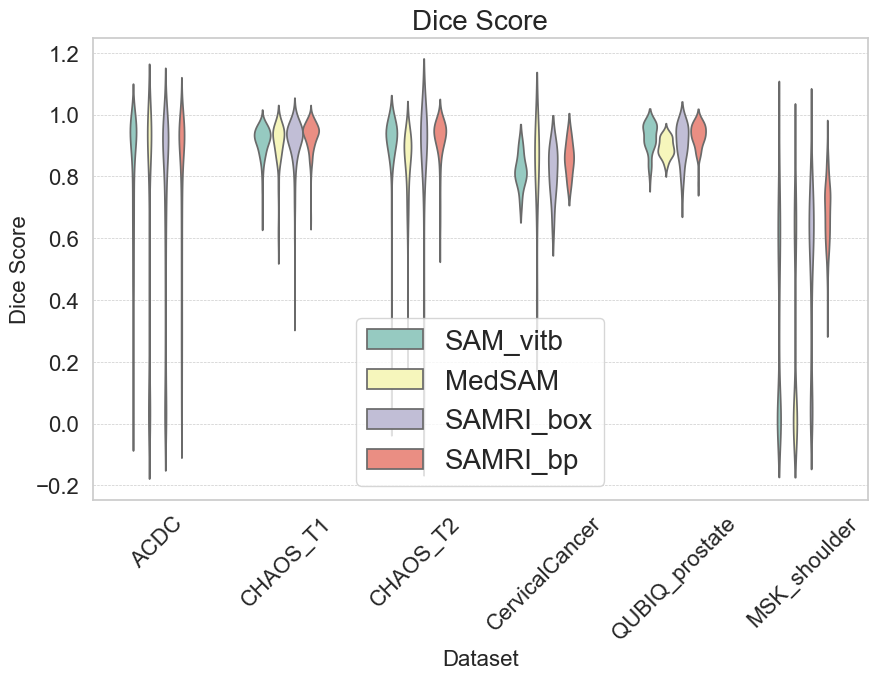

In [41]:
# Filtered dataset list
selected_datasets = [
    "ACDC", "CHAOS_T1", "CHAOS_T2",
    "CervicalCancer", "QUBIQ_prostate", "MSK_shoulder"
]
# Filtered data and sorted label order
filtered_data = all_result[all_result["Dataset"].isin(selected_datasets)]

def show_results1(result_list, prompt="b", eval="dice", x="model", plot_style="box"):
    """Show results in boxplot or violin plot.

    Args:
        result_list (list): list of pd.DataFrame, each dataframe is the result of one experiment.
        prompt (str, optional): the prompt style, choose from "b" and "p". "b": box prompt; "p": point prompt. Defaults to "b".
        eval (str, optional): the evaluation method, choose from "dice", "hd" and "msd". "dice": Dice score; "hd": Hausdorff distance; "msd": Mean surface distance. Defaults to "dice".
        x (str, optional): The x axis label, choose from "model", "ds", and "tasks". "model": by models; "ds": by datasets; "tasks": by tasks. Defaults to "model".
        plot_style (str, optional): The plot style, choose from "box" and "violin". Defaults to "box".
    """
    # combine results
    result = pd.concat(result_list, axis=0)

    # label dictionaries
    eval_ind = {
        "dice": "Dice Score",
        "hd": "Hausdorff Distance",
        "msd": "Mean Surface Distance"
    }
    eval_lib = {
        ("dice", "p"): "p_dice", 
        ("dice", "b"): "b_dice", 
        ("hd", "p"): "p_hd", 
        ("hd", "b"): "b_hd", 
        ("msd", "p"): "p_msd", 
        ("msd", "b"): "b_msd",
        ("dice", "bp"): "bp_dice", 
        ("hd", "bp"): "bp_hd", 
        ("msd", "bp"): "bp_msd"
    }

    eval_name = eval_lib[(eval, prompt)]

    # plot
    if x == "ds":
        plt.figure(figsize=(10, 6))
        if plot_style == "box":
            sns.boxplot(
                x="Dataset", y=eval_name, data=result,
                hue="Model", palette="Set3", showfliers=False, width=0.5, whis=0.5
            )
        elif plot_style == "violin":
            sns.violinplot(
                x="Dataset", y=eval_name, data=result, inner=None,
                hue="Model", palette="Set3", width=0.5
            )
        else:
            raise ValueError("plot_style should be one of 'box' and 'violin'.")
        if eval == "dice":
            plt.legend(loc="lower center", fontsize=20)
        else:
            plt.legend(loc="upper right", fontsize=20)
        plt.xticks(rotation=45, fontsize=16)
        plt.xlabel("Dataset", fontsize=16)
        
    elif x == "model":
        plt.figure(figsize=(5, 8))
        if plot_style == "box":
            sns.boxplot(
                x="Model", y=eval_name, data=result,
                palette="Set3", showfliers=False, width=0.5, whis=0.5
            )
        elif plot_style == "violin":
            sns.violinplot(
                x="Model", y=eval_name, data=result,
                palette="Set3", width=0.5
            )
        else:
            raise ValueError("plot_style should be one of 'box' and 'violin'.")
        plt.xticks(rotation=45, fontsize=14)  # larger x ticks
        plt.xlabel("Model", fontsize=16)
        
    elif x == "tasks":
        label_order = (
            result.groupby("labels")["area_percentage"]
            .mean()
            .sort_values()
            .index
        )
        fig= plt.figure()#(figsize=(20, 12))
        if plot_style == "box":
            sns.boxplot(
                    x="labels", y="b_dice", data=result,
                    hue="Model", palette="Set3", showfliers=False, width=0.5, whis=0.5,
                    order=label_order
                )
        elif plot_style == "violin":
            sns.violinplot(
                    x="labels", y="b_dice", data=result,
                    hue="Model", palette="Set3", width=0.5, inner=None,
                    order=label_order
                )
        else:
            raise ValueError("plot_style should be one of 'box' and 'violin'.")
        plt.xticks(rotation=90, fontsize=14) # larger x ticks
        plt.xlabel("Task", fontsize=16)
        plt.legend(loc="lower right", fontsize=20)
    else:
        raise ValueError("x should be one of 'model', 'ds', and 'tasks'.")
    plt.yticks(fontsize=16)               # larger y ticks
      # larger X label
    plt.ylabel(eval_ind[eval], fontsize=16)                   # Y label from eval_ind
    plt.title(eval_ind[eval], fontsize=20)
    plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
    plt.show()
show_results1(result_list=[filtered_data],  prompt="b",eval="dice", x="ds", plot_style="violin")

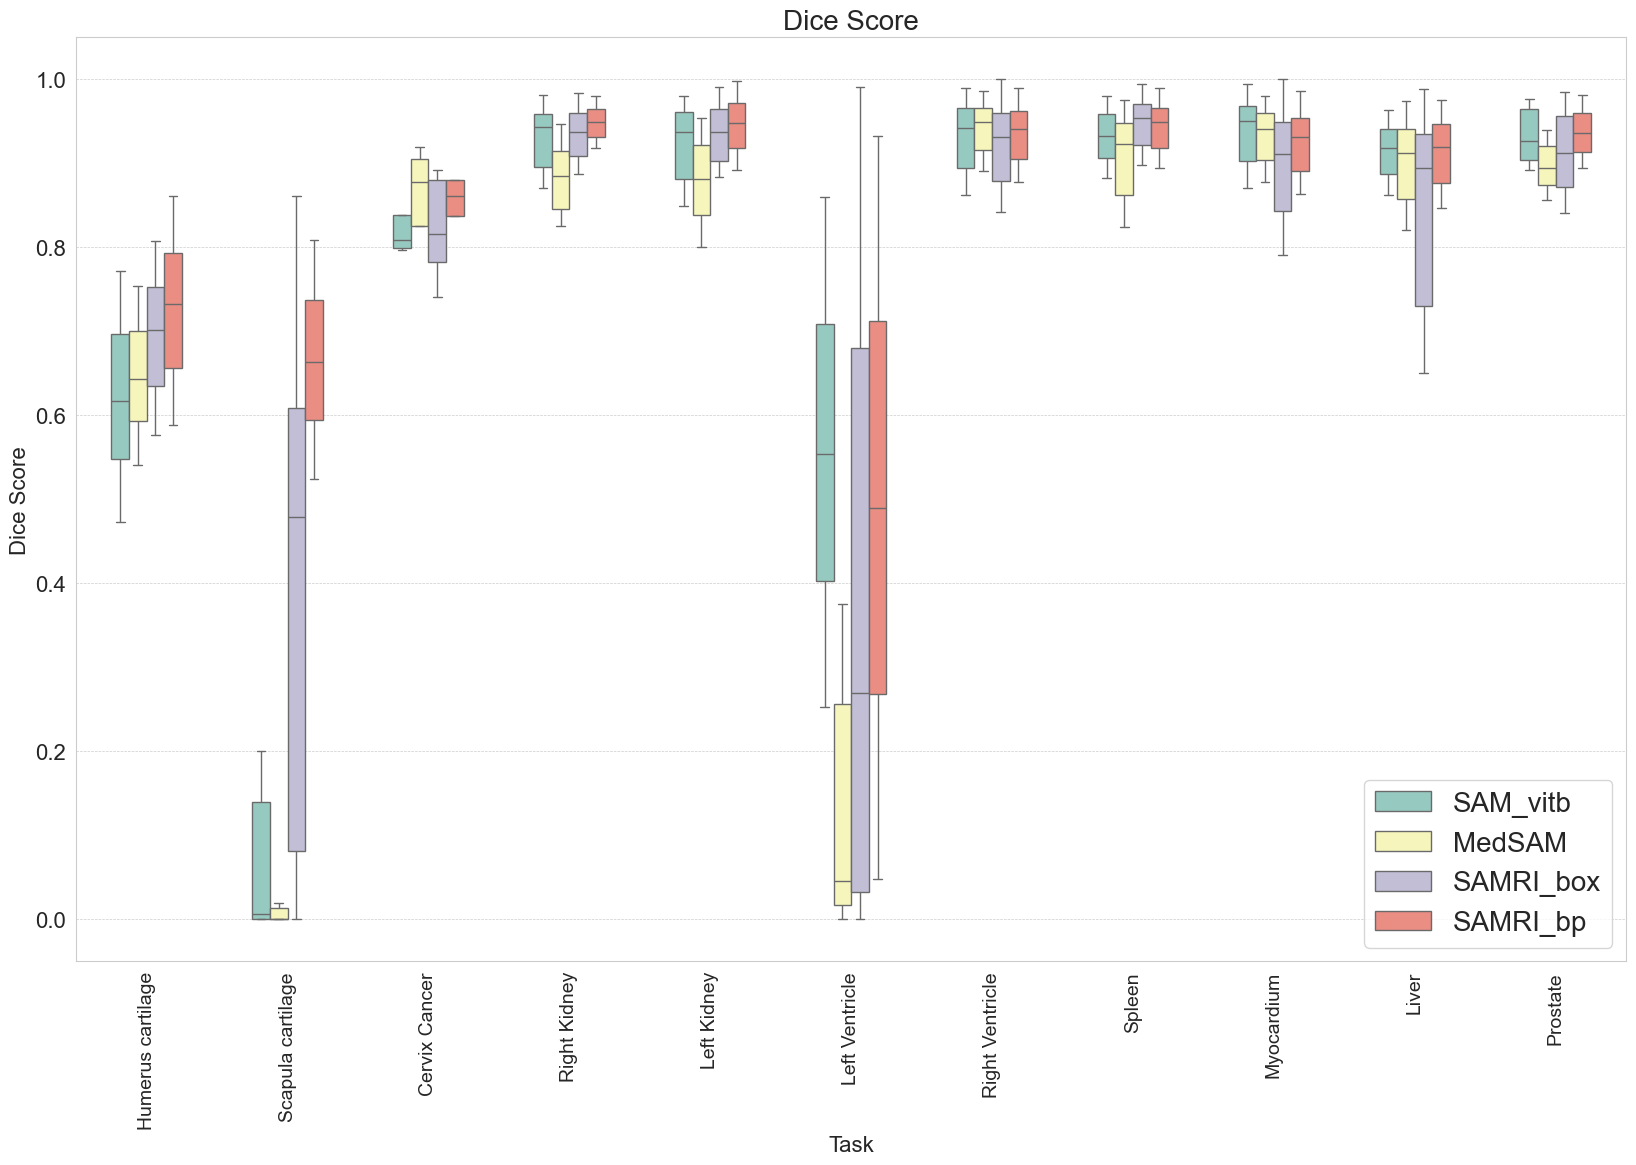

In [23]:
show_results(result_list=[filtered_data],  prompt="b",eval="dice", x="tasks", plot_style="box")

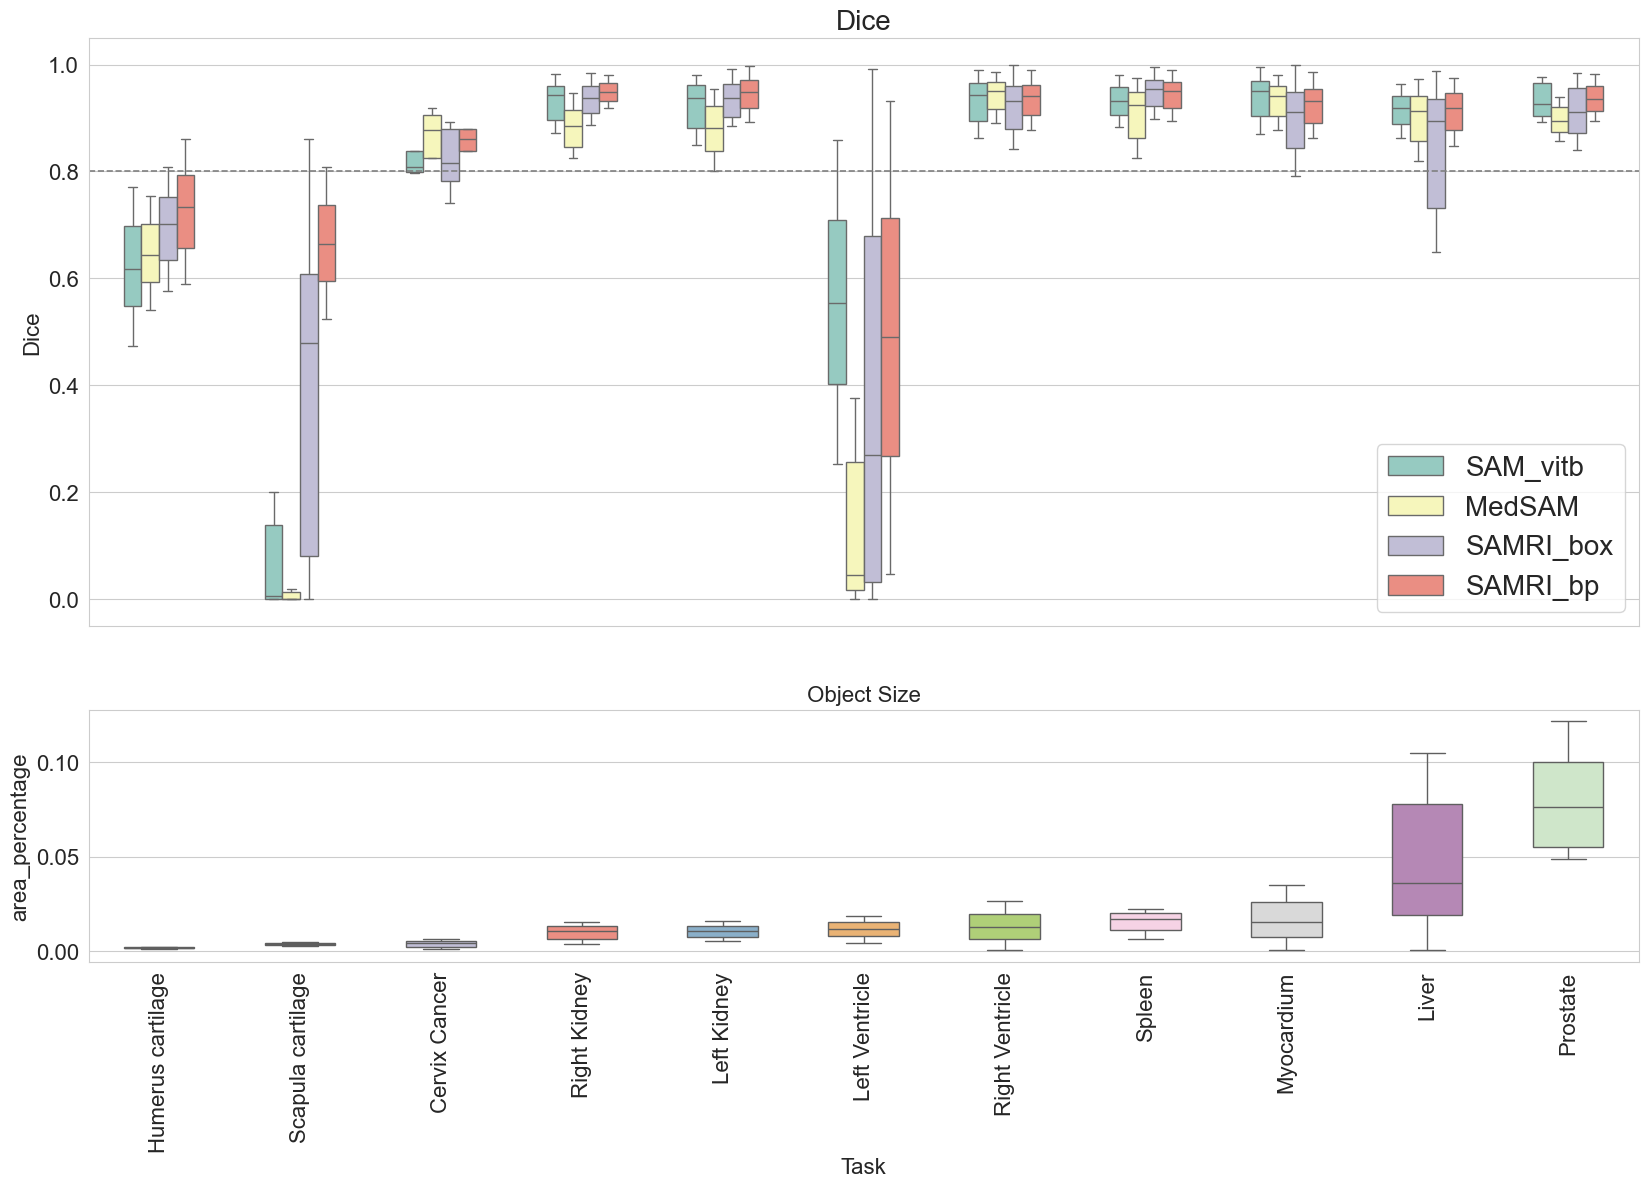

In [24]:

# Sort labels by average pixel_count
label_order = (
    filtered_data.groupby("labels")["area_percentage"]
    .mean()
    .sort_values()
    .index
)

fig, axs = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(20, 12),
    sharex=True,
    gridspec_kw={'height_ratios': [7, 3]}
)

# Top subplot: b_dice
sns.boxplot(
    x="labels", y="b_dice", data=filtered_data,
    hue="Model", palette="Set3", showfliers=False, width=0.5, whis=0.5,
    order=label_order, ax=axs[0]
)
axs[0].axhline(y=0.8, color='gray', linestyle='--', linewidth=1.2)
axs[0].legend(loc="lower right", fontsize=20)
axs[0].set_title("Dice", fontsize=20)
axs[0].set_ylabel("Dice", fontsize=16)
axs[0].tick_params(axis='y', labelsize=16)

# Bottom subplot: pixel_count
sns.boxplot(
    x="labels", y="area_percentage", data=filtered_data,
    palette="Set3", showfliers=False, width=0.5, whis=0.5,
    order=label_order, ax=axs[1]
)
axs[1].legend([], [], frameon=False)
axs[1].set_title("Object Size", fontsize=16)
axs[1].set_xlabel("Task", fontsize=16)
axs[1].set_ylabel("area_percentage", fontsize=16)
axs[1].tick_params(axis='y', labelsize=16)

plt.xticks(rotation=90, fontsize=16)
plt.show()


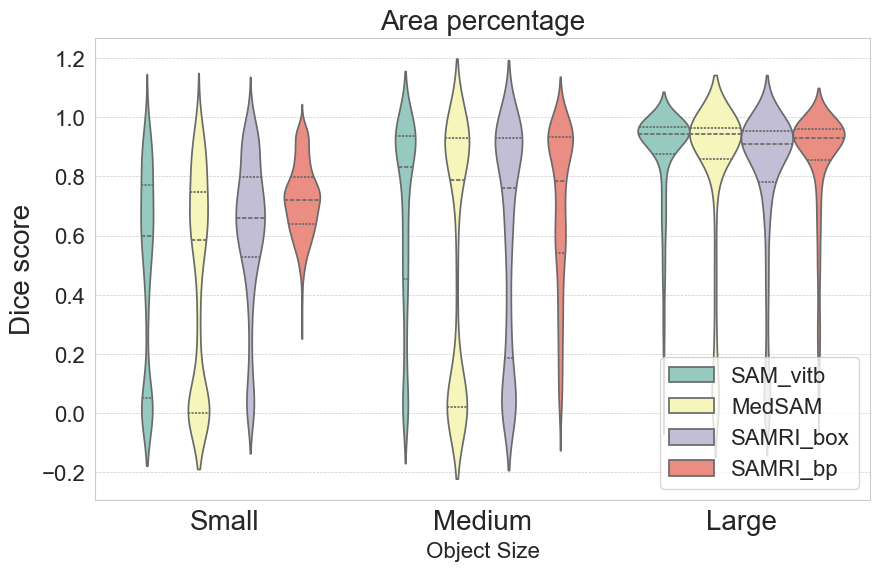

In [25]:
small_object_show(filtered_data, plot_style="violin")

In [26]:
summarize_metric(filtered_data, group_by="Dataset", eval_key="dice")

Model,SAM_vitb,MedSAM,SAMRI_box,SAMRI_bp
Dataset,,,,
ACDC,"0.90 (0.66, 0.96)","0.90 (0.22, 0.95)","0.87 (0.55, 0.94)","0.90 (0.66, 0.95)"
CervicalCancer,"0.81 (0.80, 0.84)","0.88 (0.83, 0.91)","0.82 (0.78, 0.88)","0.86 (0.84, 0.88)"
CHAOS_T1,"0.92 (0.89, 0.95)","0.92 (0.88, 0.95)","0.93 (0.89, 0.95)","0.94 (0.91, 0.96)"
CHAOS_T2,"0.94 (0.89, 0.96)","0.88 (0.80, 0.92)","0.93 (0.85, 0.96)","0.94 (0.90, 0.96)"
MSK_shoulder,"0.27 (0.00, 0.62)","0.02 (0.00, 0.62)","0.59 (0.30, 0.70)","0.69 (0.61, 0.75)"
QUBIQ_prostate,"0.93 (0.90, 0.96)","0.89 (0.87, 0.92)","0.91 (0.87, 0.96)","0.94 (0.91, 0.96)"
AVG,0.79 ± 0.26,0.75 ± 0.36,0.84 ± 0.13,0.88 ± 0.10


# Train/Val/Test Loss and model seletion.

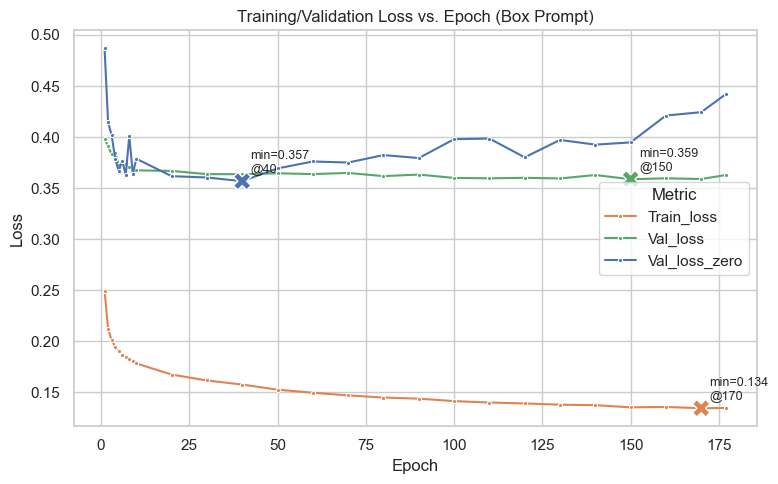

In [27]:
loss_box = pd.read_csv(FOLDER_PATH + "loss_b.csv")

loss_cols = ["Val_loss_zero", "Train_loss", "Val_loss"]

# long + average across Model (so there are exactly 3 lines)
long = loss_box.melt(id_vars=["Model", "Epoch"], value_vars=loss_cols,
               var_name="Metric", value_name="Loss")
avg = (long.groupby(["Epoch", "Metric"], as_index=False)
            .agg(Loss=("Loss", "mean")))

# find the minimum Loss epoch for each Metric
mins = avg.loc[avg.groupby("Metric")["Loss"].idxmin()].copy()

sns.set_theme(style="whitegrid")
palette = dict(zip(["Val_loss_zero", "Train_loss", "Val_loss"],
                   sns.color_palette(n_colors=3)))

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=avg, x="Epoch", y="Loss", hue="Metric",
                  marker=".", palette=palette)

# highlight minima
sns.scatterplot(data=mins, x="Epoch", y="Loss", hue="Metric",
                marker="X", s=160, palette=palette, legend=False, zorder=5)

# annotate values
for _, r in mins.iterrows():
    ax.annotate(f"min={r['Loss']:.3f}\n@{int(r['Epoch'])}",
                (r["Epoch"], r["Loss"]),
                textcoords="offset points", xytext=(6,6), fontsize=9)

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training/Validation Loss vs. Epoch (Box Prompt)")
ax.legend(title="Metric")
plt.tight_layout()
plt.show()

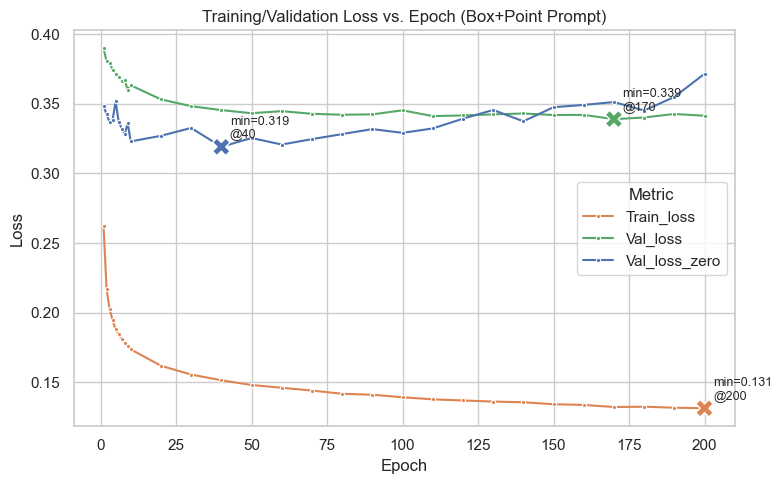

In [28]:
loss_bp = pd.read_csv(FOLDER_PATH + "loss_bp.csv")

loss_cols = ["Val_loss_zero", "Train_loss", "Val_loss"]

# long + average across Model (so there are exactly 3 lines)
long = loss_bp.melt(id_vars=["Model", "Epoch"], value_vars=loss_cols,
               var_name="Metric", value_name="Loss")
avg = (long.groupby(["Epoch", "Metric"], as_index=False)
            .agg(Loss=("Loss", "mean")))

# find the minimum Loss epoch for each Metric
mins = avg.loc[avg.groupby("Metric")["Loss"].idxmin()].copy()

sns.set_theme(style="whitegrid")
palette = dict(zip(["Val_loss_zero", "Train_loss", "Val_loss"],
                   sns.color_palette(n_colors=3)))

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=avg, x="Epoch", y="Loss", hue="Metric",
                  marker=".", palette=palette)

# highlight minima
sns.scatterplot(data=mins, x="Epoch", y="Loss", hue="Metric",
                marker="X", s=160, palette=palette, legend=False, zorder=5)

# annotate values
for _, r in mins.iterrows():
    ax.annotate(f"min={r['Loss']:.3f}\n@{int(r['Epoch'])}",
                (r["Epoch"], r["Loss"]),
                textcoords="offset points", xytext=(6,6), fontsize=9)

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training/Validation Loss vs. Epoch (Box+Point Prompt)")
ax.legend(title="Metric")
plt.tight_layout()
plt.show()

# Visualize the datasets.

In [29]:
df = pd.read_csv(FOLDER_PATH + "samri_dataset_summary.csv")
df = project_label(df)
df = add_part_column(df)

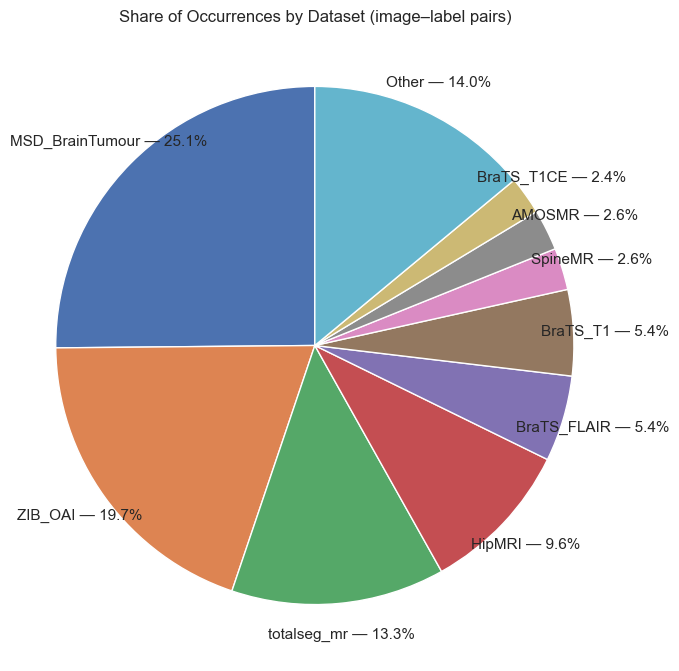

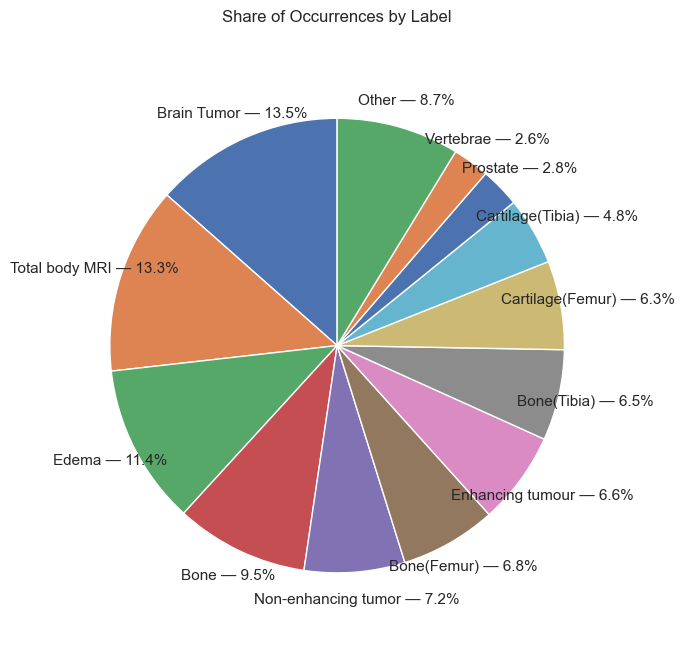

In [30]:
def make_pie_with_percent_in_label(count_df, name_col, count_col, title,
                                   small_thresh=0.02, max_labels=None):
    """
    Build a pie chart where each slice's label is 'Name — XX.X%' placed OUTSIDE.
    Small slices are grouped as 'Other'.
    """
    # sort and compute fractions
    count_df = count_df.sort_values(count_col, ascending=False).reset_index(drop=True)
    if max_labels is not None and len(count_df) > max_labels:
        count_df = count_df.head(max_labels)

    total = count_df[count_col].sum()
    count_df["frac"] = count_df[count_col] / total

    # group small slices
    major = count_df[count_df["frac"] >= small_thresh].copy()
    minor = count_df[count_df["frac"] < small_thresh].copy()
    if not minor.empty:
        other = pd.DataFrame({
            name_col: ["Other"],
            count_col: [minor[count_col].sum()],
            "frac": [minor["frac"].sum()]
        })
        plot_df = pd.concat([major[[name_col, count_col, "frac"]], other], ignore_index=True)
    else:
        plot_df = major[[name_col, count_col, "frac"]]

    # labels like "Name — 12.3%"
    labels = [f"{n} — {f*100:.1f}%" for n, f in zip(plot_df[name_col], plot_df["frac"])]
    sizes  = plot_df[count_col].values

    fig, ax = plt.subplots(figsize=(7, 7))
    wedges, texts = ax.pie(
        sizes,
        labels=labels,
        startangle=90,
        labeldistance=1.12,              # push labels a bit outside
        wedgeprops=dict(linewidth=1, edgecolor="white")
    )
    # draw leader lines
    for t, w in zip(texts, wedges):
        t.set_ha('center')
        t.set_va('center')

    ax.set_title(title)
    ax.axis("equal")  # perfect circle
    plt.tight_layout()
    plt.show()

# =========================
# Pie 1: counts by dataset
# =========================
counts_by_dataset = (
    df.groupby("Dataset", as_index=False)
      .size()
      .rename(columns={"size": "count"})
)
make_pie_with_percent_in_label(
    counts_by_dataset,
    name_col="Dataset",
    count_col="count",
    title="Share of Occurrences by Dataset (image–label pairs)",
    small_thresh=0.02,   # group slices <2%
    max_labels=None      # or e.g. 20 to cap the number of labels
)

# =======================
# Pie 2: counts by label
# =======================
counts_by_label = (
    df.groupby("labels", as_index=False)
      .size()
      .rename(columns={"size": "count"})
)
counts_by_label["labels"] = counts_by_label["labels"].astype(str)

make_pie_with_percent_in_label(
    counts_by_label,
    name_col="labels",
    count_col="count",
    title="Share of Occurrences by Label",
    small_thresh=0.02
)


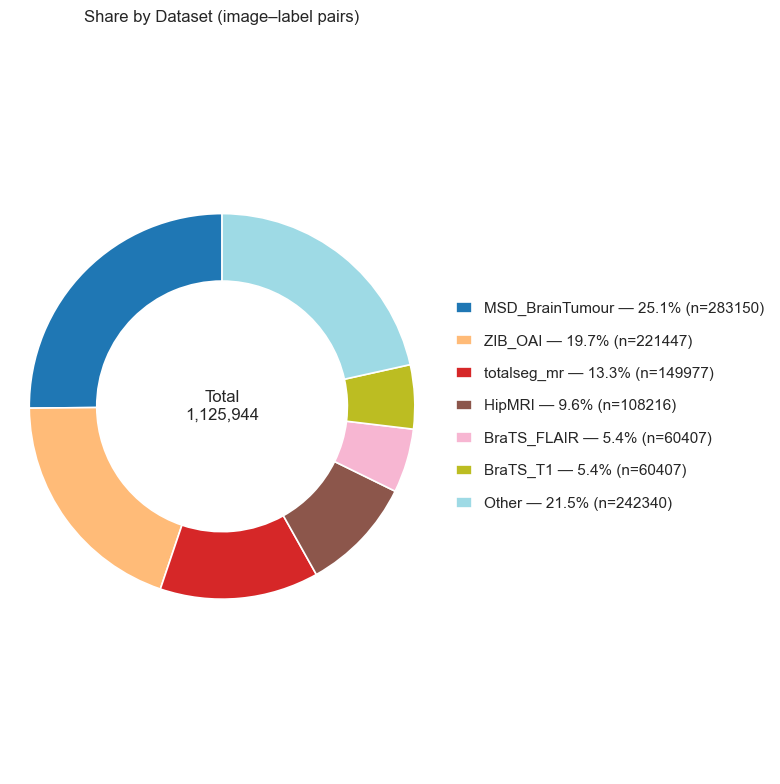

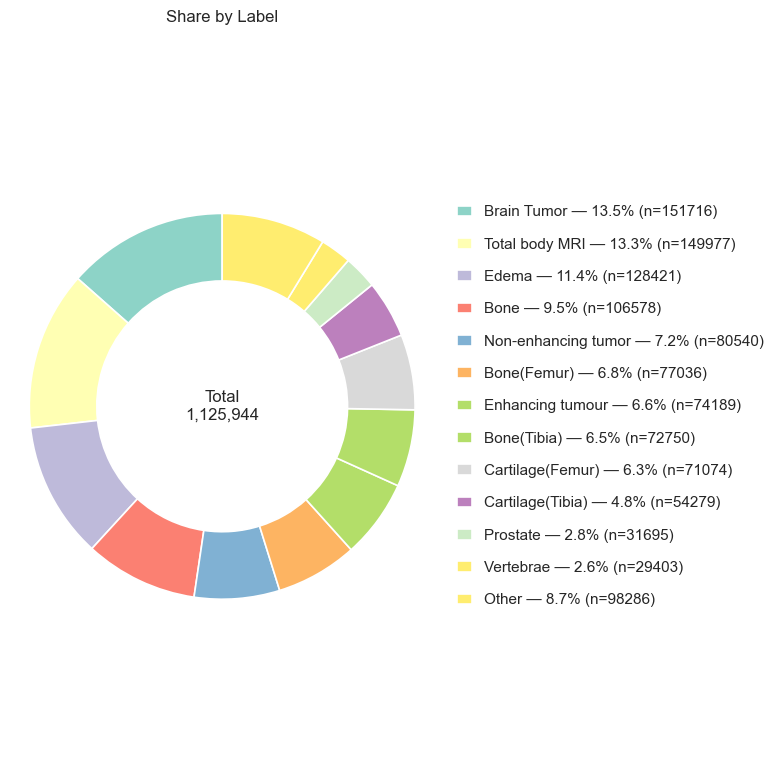

In [31]:
def pretty_pie(count_df, name_col, count_col, title,
               small_thresh=0.03, max_labels=None,
               use_legend=True, donut=True, palette="tab20",
               pct_decimals=1):
    """
    Make a clean pie/donut chart.
    - Groups tiny slices into 'Other' (< small_thresh fraction of total).
    - Puts 'Name — XX.X% (n=...)' in labels (or legend if use_legend=True).
    - Set donut=False for a classic pie.
    """
    df = count_df.sort_values(count_col, ascending=False).reset_index(drop=True)
    if max_labels and len(df) > max_labels:
        df = df.head(max_labels)

    total = df[count_col].sum()
    df["frac"] = df[count_col] / total

    major = df[df["frac"] >= small_thresh].copy()
    minor = df[df["frac"] < small_thresh].copy()
    if not minor.empty:
        other = pd.DataFrame({name_col: ["Other"],
                              count_col: [minor[count_col].sum()],
                              "frac": [minor["frac"].sum()]})
        plot_df = pd.concat([major[[name_col, count_col, "frac"]], other], ignore_index=True)
    else:
        plot_df = major[[name_col, count_col, "frac"]]

    # labels
    fmt = f"{{:.{pct_decimals}f}}%"
    labels = [f"{n} — {fmt.format(f*100)} (n={int(c)})"
              for n, f, c in zip(plot_df[name_col], plot_df["frac"], plot_df[count_col])]
    sizes = plot_df[count_col].values

    # draw
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, _ = ax.pie(
        sizes,
        labels=None if use_legend else labels,
        startangle=90,
        wedgeprops=dict(edgecolor="white", linewidth=1.2, width=0.35 if donut else 1.0),
        pctdistance=0.85,  # not used (autopct off), but keeps spacing nice
        colors=plt.get_cmap(palette)(np.linspace(0, 1, len(sizes)))
    )

    # Optional legend (cleaner than long labels around the pie)
    if use_legend:
        ax.legend(
            wedges, labels,
            title=None,
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
            frameon=False,
            handlelength=1.0,
            labelspacing=1.2
        )
    else:
        # place labels outside with slight padding and leader lines
        kw = dict(arrowprops=dict(arrowstyle="-", color="0.5"),
                  va="center", ha="center")
        for w, lab in zip(wedges, labels):
            ang = (w.theta2 + w.theta1) / 2.0
            x = np.cos(np.deg2rad(ang))
            y = np.sin(np.deg2rad(ang))
            ax.annotate(lab, xy=(x*0.9, y*0.9), xytext=(1.15*np.sign(x), 1.2*y),
                        textcoords="data", **kw)

    # center text (total)
    if donut:
        ax.text(0, 0, f"Total\n{int(total):,}", ha="center", va="center", fontsize=12)

    ax.set_title(title, pad=12)
    ax.axis("equal")
    fig.tight_layout()
    plt.show()


# 1) Counts by dataset
counts_by_dataset = (
    df.groupby("Dataset", as_index=False)
      .size().rename(columns={"size": "count"})
)
pretty_pie(counts_by_dataset, "Dataset", "count",
           title="Share by Dataset (image–label pairs)",
           small_thresh=0.03, max_labels=None, use_legend=True, donut=True, palette="tab20")

# 2) Counts by label
counts_by_label = (
    df.groupby("labels", as_index=False)
      .size().rename(columns={"size": "count"})
)
counts_by_label["labels"] = counts_by_label["labels"].astype(str)
pretty_pie(counts_by_label, "labels", "count",
           title="Share by Label",
           small_thresh=0.02, use_legend=True, donut=True, palette="Set3")


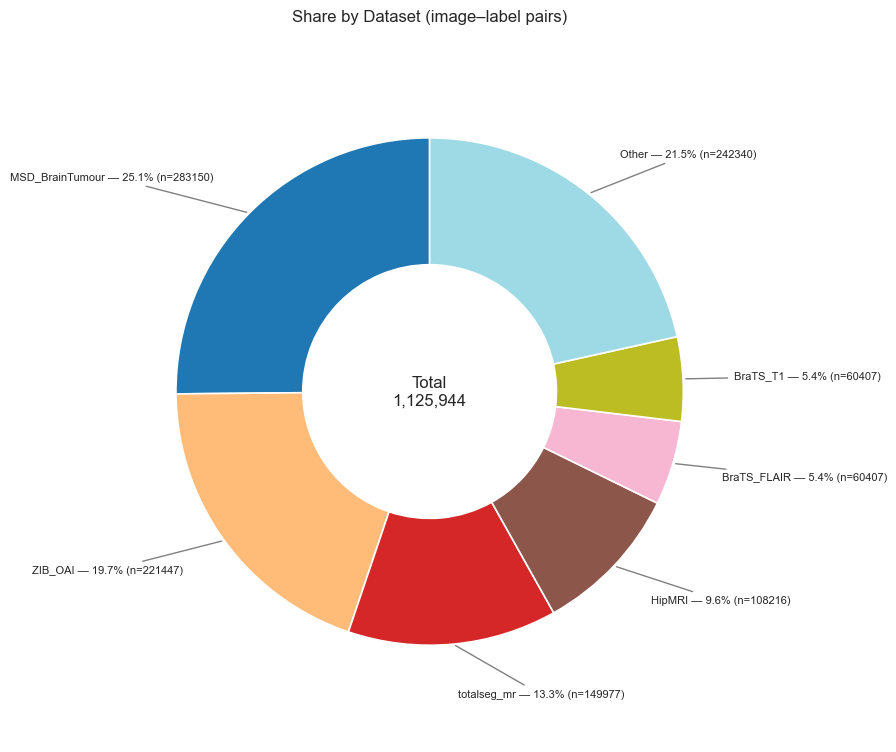

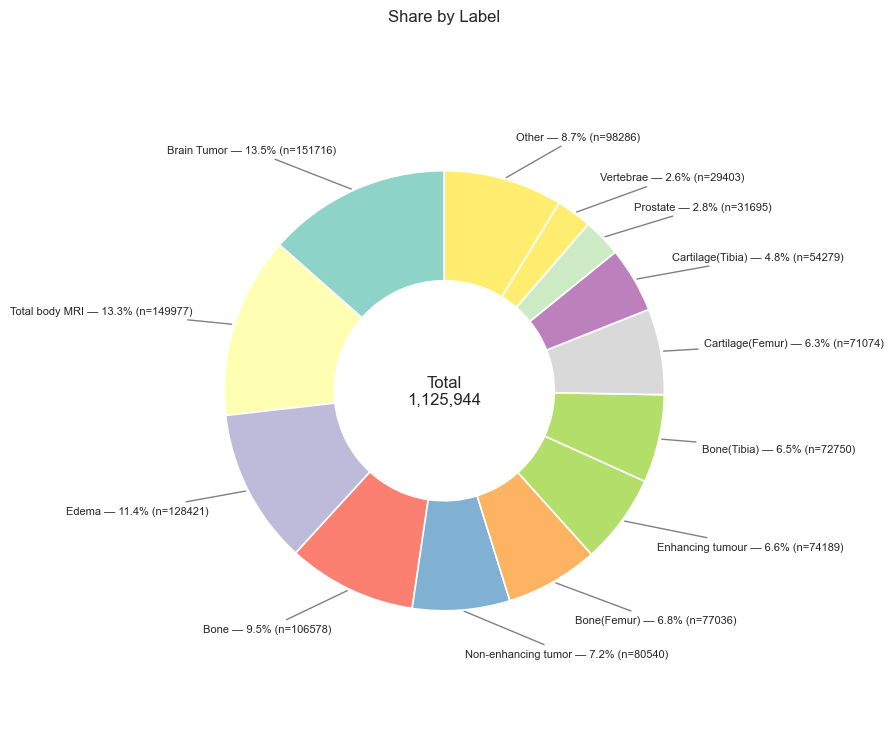

In [32]:
# ---------- Core helper: ring (donut) pie with outside labels + connectors ----------
def ring_pie_with_connectors(count_df, name_col, count_col, title,
                             small_thresh=0.03, max_labels=None,
                             inner_width=0.35,  # 0..1 (smaller = fatter ring)
                             palette=None, pct_decimals=1):
    """
    Draw a donut (ring) pie where labels are outside with connector lines.
    - Groups tiny slices into 'Other' if below small_thresh fraction of total.
    - Shows 'Name — XX.X% (n=...)' for each slice.
    """
    df = count_df.sort_values(count_col, ascending=False).reset_index(drop=True)
    if max_labels and len(df) > max_labels:
        df = df.head(max_labels)

    total = df[count_col].sum()
    df["frac"] = df[count_col] / total

    # group tiny slices as 'Other'
    major = df[df["frac"] >= small_thresh].copy()
    minor = df[df["frac"] < small_thresh].copy()
    if not minor.empty:
        other = pd.DataFrame({name_col: ["Other"],
                              count_col: [minor[count_col].sum()],
                              "frac": [minor["frac"].sum()]})
        plot_df = pd.concat([major[[name_col, count_col, "frac"]], other], ignore_index=True)
    else:
        plot_df = major[[name_col, count_col, "frac"]]

    labels = [f"{n} — {f*100:.{pct_decimals}f}% (n={int(c)})"
              for n, f, c in zip(plot_df[name_col], plot_df["frac"], plot_df[count_col])]
    sizes = plot_df[count_col].to_numpy()

    # colors
    if palette is None:
        cmap = plt.get_cmap("tab20")
        colors = cmap(np.linspace(0, 1, len(sizes)))
    else:
        # palette can be a matplotlib cmap name or an explicit list
        if isinstance(palette, str):
            cmap = plt.get_cmap(palette)
            colors = cmap(np.linspace(0, 1, len(sizes)))
        else:
            colors = palette

    fig, ax = plt.subplots(figsize=(9, 8))

    # Draw ring (donut) – width controls the hole
    wedges, _ = ax.pie(
        sizes,
        startangle=90,
        labels=None,                  # we’ll place labels manually outside
        colors=colors,
        wedgeprops=dict(edgecolor="white", linewidth=1.2, width=inner_width),
        counterclock=True
    )

    # Place labels outside with connector lines
    # Compute mid-angles of each wedge to position labels
    for w, lab in zip(wedges, labels):
        ang = (w.theta2 + w.theta1) / 2.0
        ang_rad = np.deg2rad(ang)
        # point at ring outer edge
        r_outer = 1.0                 # pie radius
        x = r_outer * np.cos(ang_rad)
        y = r_outer * np.sin(ang_rad)

        # target label position outside the ring
        label_r = 1.20                # how far outside labels go
        lx = label_r * np.cos(ang_rad)
        ly = label_r * np.sin(ang_rad)

        # align text: left on right side; right on left side
        ha = "left" if lx >= 0 else "right"

        ax.annotate(
            lab,
            xy=(x, y),                 # point on slice edge
            xytext=(lx, ly),           # label position
            textcoords="data",
            ha=ha, va="center",
            fontsize=8,
            arrowprops=dict(arrowstyle="-", color="0.5", lw=1),
        )

    # Center text: total n
    ax.text(0, 0, f"Total\n{int(total):,}", ha="center", va="center", fontsize=12)

    ax.set_title(title, pad=14)
    ax.axis("equal")
    fig.tight_layout()
    plt.show()

# 1) Ring pie: counts by dataset
counts_by_dataset = (
    df.groupby("Dataset", as_index=False)
      .size().rename(columns={"size": "count"})
)
ring_pie_with_connectors(
    counts_by_dataset, "Dataset", "count",
    title="Share by Dataset (image–label pairs)",
    small_thresh=0.03, inner_width=0.5, palette="tab20"
)

# 2) Ring pie: counts by label
counts_by_label = (
    df.groupby("labels", as_index=False)
      .size().rename(columns={"size": "count"})
)
counts_by_label["labels"] = counts_by_label["labels"].astype(str)

ring_pie_with_connectors(
    counts_by_label, "labels", "count",
    title="Share by Label",
    small_thresh=0.02, inner_width=0.5, palette="Set3"
)


In [33]:
df["part"].value_counts(normalize=True).mul(100).rename("pct").reset_index().rename(columns={"index": "Dataset"})

,part,pct
0,Brain,40.922906
1,Knee,25.898180
2,Total body,13.320112
3,Abdomen,13.078626
4,Prostate,2.961604
5,Vertebrae,2.611409
6,Shoulder,0.548073
7,Head,0.422668
8,Thorax,0.236424


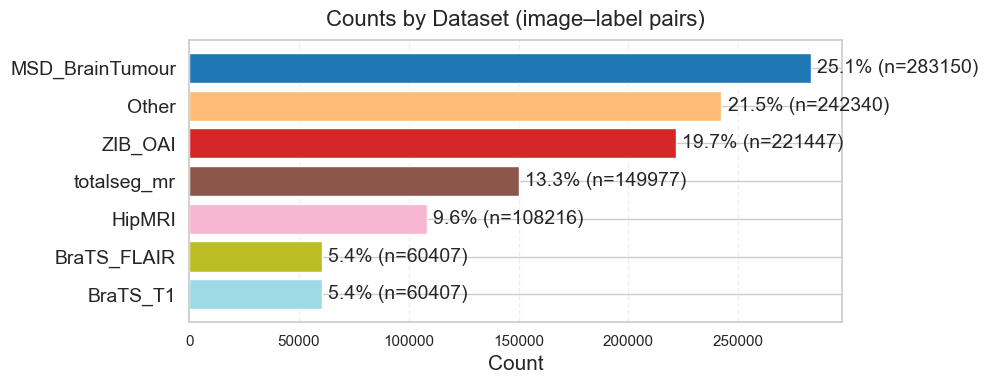

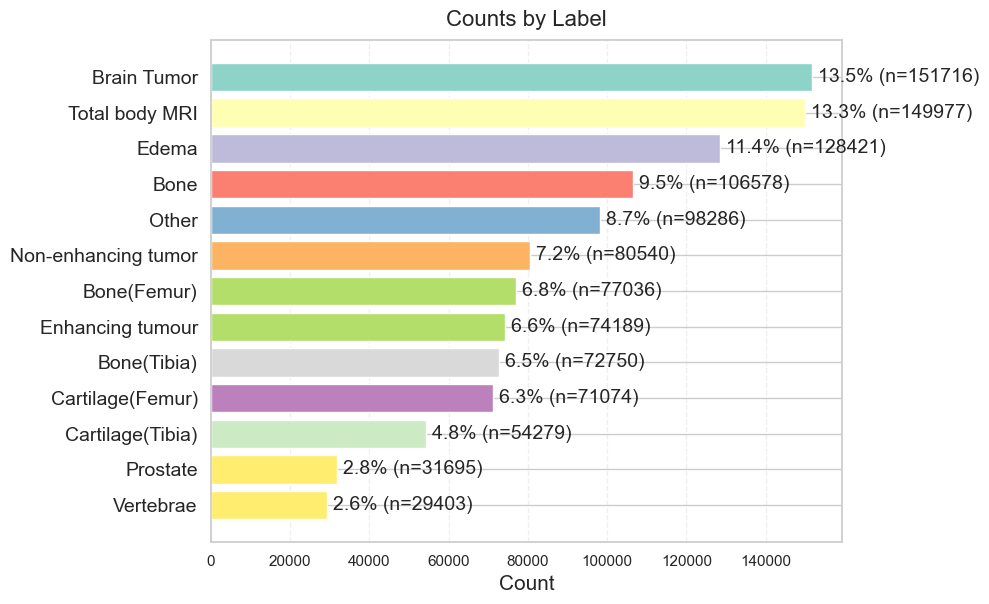

In [44]:
# ---------- Core helper: bar chart with optional "Other" bucket ----------
def bar_chart_with_other(count_df, name_col, count_col, title,
                         small_thresh=0.03, max_bars=None,
                         palette=None, pct_decimals=1,
                         orientation="h", sort_desc=True,
                         annotate=True, fontsize=9):
    """
    Draw a bar chart of counts with optional:
      - grouping tiny categories into 'Other' if they are below `small_thresh` fraction of total
      - limiting to top `max_bars` categories
      - percentage+count annotations on bars

    Parameters
    ----------
    count_df : DataFrame with [name_col, count_col]
    name_col : str, category column name
    count_col: str, count column name
    title    : str
    small_thresh : float in [0,1], threshold to merge into 'Other'
    max_bars : int | None, keep only the largest N categories (after merging)
    palette  : None | str | list, matplotlib cmap name or list of colors
    pct_decimals : int, decimals for percentage
    orientation : "h" (horizontal) or "v" (vertical)
    sort_desc : bool, sort bars descending by count
    annotate : bool, annotate each bar with "XX.X% (n=..)"
    fontsize : int, tick/label font size
    """
    df = count_df.copy()
    df = df.sort_values(count_col, ascending=False).reset_index(drop=True)

    # Merge "small" categories to 'Other'
    total = df[count_col].sum()
    if total == 0:
        raise ValueError("Total count is zero; nothing to plot.")
    df["frac"] = df[count_col] / total

    major = df[df["frac"] >= small_thresh].copy()
    minor = df[df["frac"] < small_thresh].copy()
    if not minor.empty:
        other = pd.DataFrame({
            name_col: ["Other"],
            count_col: [minor[count_col].sum()],
            "frac": [minor["frac"].sum()]
        })
        plot_df = pd.concat([major[[name_col, count_col, "frac"]], other], ignore_index=True)
    else:
        plot_df = major[[name_col, count_col, "frac"]]

    # Keep only top-N categories if requested (after merging)
    plot_df = plot_df.sort_values(count_col, ascending=False).reset_index(drop=True)
    if max_bars and len(plot_df) > max_bars:
        # If cutting, push the rest into 'Other' again so totals remain consistent
        head = plot_df.head(max_bars - 1) if max_bars > 1 else pd.DataFrame(columns=plot_df.columns)
        tail = plot_df.iloc[len(head):]
        if not tail.empty:
            other2 = pd.DataFrame({
                name_col: ["Other"],
                count_col: [tail[count_col].sum()],
                "frac": [tail[count_col].sum() / total]
            })
            plot_df = pd.concat([head, other2], ignore_index=True)
        else:
            plot_df = head

    if sort_desc:
        plot_df = plot_df.sort_values(count_col, ascending=False)

    # Colors
    if palette is None:
        cmap = plt.get_cmap("tab20")
        colors = cmap(np.linspace(0, 1, len(plot_df)))
    else:
        if isinstance(palette, str):
            cmap = plt.get_cmap(palette)
            colors = cmap(np.linspace(0, 1, len(plot_df)))
        else:
            colors = palette[:len(plot_df)]

    names = plot_df[name_col].astype(str).tolist()
    counts = plot_df[count_col].to_numpy()
    fracs  = plot_df[count_col].to_numpy() / total

    fig, ax = plt.subplots(figsize=(10, max(4, 0.4 * len(plot_df) + 1)))

    if orientation == "h":
        bars = ax.barh(range(len(names)), counts, color=colors)
        ax.set_yticks(range(len(names)), labels=names, fontsize=fontsize)
        ax.invert_yaxis()  # largest at top
        ax.set_xlabel("Count", fontsize=fontsize+1)
        ax.set_title(title, pad=10, fontsize=fontsize+2)

        if annotate:
            for i, (b, c, f) in enumerate(zip(bars, counts, fracs)):
                txt = f"{f*100:.{pct_decimals}f}% (n={int(c)})"
                ax.text(b.get_width() + max(counts)*0.01, b.get_y() + b.get_height()/2,
                        txt, va="center", fontsize=fontsize)
    else:
        bars = ax.bar(range(len(names)), counts, color=colors)
        ax.set_xticks(range(len(names)), labels=names, rotation=45, ha="right", fontsize=fontsize)
        ax.set_ylabel("Count", fontsize=fontsize+1)
        ax.set_title(title, pad=10, fontsize=fontsize+2)

        if annotate:
            for i, (b, c, f) in enumerate(zip(bars, counts, fracs)):
                txt = f"{f*100:.{pct_decimals}f}% (n={int(c)})"
                ax.text(b.get_x() + b.get_width()/2, b.get_height(),
                        txt, ha="center", va="bottom", fontsize=fontsize)

    ax.grid(axis="x" if orientation == "h" else "y", linestyle="--", alpha=0.3)
    fig.tight_layout()
    plt.show()

# 1) Bar chart: counts by dataset
counts_by_dataset = (
    df.groupby("Dataset", as_index=False)
      .size().rename(columns={"size": "count"})
)

bar_chart_with_other(
    counts_by_dataset, "Dataset", "count",
    title="Counts by Dataset (image–label pairs)",
    small_thresh=0.03, max_bars=None, palette="tab20",
    orientation="h", pct_decimals=1,
    fontsize=14   # 👈 increase this
)

# 2) Bar chart: counts by label
counts_by_label = (
    df.groupby("labels", as_index=False)
      .size().rename(columns={"size": "count"})
)
counts_by_label["labels"] = counts_by_label["labels"].astype(str)

bar_chart_with_other(
    counts_by_label, "labels", "count",
    title="Counts by Label",
    small_thresh=0.02, max_bars=None, palette="Set3",
    orientation="h", pct_decimals=1,
    fontsize=14   # 👈 increase this
)

